### Plotting supply and demand ###

Using data from Drax Electric Insights, this script plots the supply and demand of electricity in the UK.

In [1]:
# standard libraries
from pathlib import Path

# maths libraries
import numpy as np

# geodata libraries
import pandas as pd

# Import iris
import iris

# plotting libraries (not required for the actual calculations)
import matplotlib.pyplot as plt

import sys
import os
from iris.pandas import as_data_frame

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
# # Load all of Hannah's data into a single DataFrame
# hannah_dir = "/home/users/benhutch/energy-sotcr-2024-2025/hannah_data"

# cdd_ts_glob_24 = "ERA5_United_Kingdom_2024_*_CDD_timeseries.nc"
# cdd_ts_glob_25 = "ERA5_United_Kingdom_2025_*_CDD_timeseries.nc"
# hdd_ts_glob_24 = "ERA5_United_Kingdom_2024_*_HDD_timeseries.nc"
# hdd_ts_glob_25 = "ERA5_United_Kingdom_2025_*_HDD_timeseries.nc"
# full_demand_glob = "ERA5_United_Kingdom_20*_*_hourly_full_demand.nc"
# wd_demand_glob = "ERA5_United_Kingdom_20*_*_hourly_wd_demand.nc"
# solar_glob = "ERA5_United_Kingdom_20*_*_solar_PV_hourly_timeseries.nc"
# ssrd_glob = "ERA5_United_Kingdom_20*_*_ssrd_hourly_timeseries.nc"
# t2m_glob = "ERA5_United_Kingdom_20*_*_T2m_hourly_timeseries.nc"
# hh_ws_glob = "ERA5_United_Kingdom_current_20*_*_hub_height_speed_timeseries.nc"
# wp_gen_glob = "ERA5_United_Kingdom_current_20*_*_WP_timeseries.nc"

# # Create a list of all the file paths
# daily_file_paths = [
#     [Path(hannah_dir) / hdd_ts_glob_24, Path(hannah_dir) / hdd_ts_glob_25],
#     [Path(hannah_dir) / cdd_ts_glob_24, Path(hannah_dir) / cdd_ts_glob_25],
# ]

# daily_var_names = [
#     "HDD",
#     "CDD",
# ]

# hourly_file_paths = [
#     Path(hannah_dir) / t2m_glob,
#     Path(hannah_dir) / full_demand_glob,
#     Path(hannah_dir) / wd_demand_glob,
#     Path(hannah_dir) / solar_glob,
#     Path(hannah_dir) / ssrd_glob,
#     Path(hannah_dir) / hh_ws_glob,
#     Path(hannah_dir) / wp_gen_glob,
# ]

# hourly_var_names = [
#     "T2m",
#     "full_demand",
#     "wd_demand",
#     "solar_PV",
#     "ssrd",
#     "hh_ws",
#     "wp_gen",
# ]

In [3]:
# # Loop over the list of file paths and read each file into a DataFrame
# dfs = []
# for k, file_path in enumerate(daily_file_paths):
#     cubes_24 = iris.load(file_path[0])  # Load the first file for 2024

#     # Print cubes
#     print(cubes_24)

#     # set up an empty dataframe to hold the data
#     df_full_24 = pd.DataFrame()

#     # Loop over the cubes and print their names
#     for i, cube_this in enumerate(cubes_24):
#         # Convert to a dataframe
#         df_this = as_data_frame(cube_this)

#         # Reset the index to ensure it is a column
#         df_this.reset_index(inplace=True)

#         # If the time/index is day of the year in 2024, convert it to a date
#         if "index" in df_this.columns:
#             # Create a date column starting from April 1st 2024
#             df_this["date"] = pd.to_datetime("2023-12-31") + pd.to_timedelta(
#                 df_this["index"], unit="D"
#             )

#             # Print the min and max index this
#             print(
#                 f"Cube {i} index range: {df_this['index'].min()} to {df_this['index'].max()}"
#             )

#             # Set the date as the index
#             df_this.set_index("date", inplace=True)

#             # Drop the original index column
#             if "index" in df_this.columns:
#                 df_this.drop(columns=["index"], inplace=True)

#             # Concatenate the dataframes
#             df_full_24 = pd.concat([df_full_24, df_this])
#         else:
#             print(
#                 f"Skipping cube {i} from {file_path.name} as it does not have an 'index' column."
#             )

#     # Set up  the df_full_25
#     cubes_25 = iris.load(file_path[1])  # Load the second file for 2025

#     # Set up an empty dataframe to hold the data
#     df_full_25 = pd.DataFrame()

#     # Loop over the cubes and print their names
#     for i, cube_this in enumerate(cubes_25):
#         # Convert to a dataframe
#         df_this = as_data_frame(cube_this)

#         # Reset the index to ensure it is a column
#         df_this.reset_index(inplace=True)

#         # If the time/index is day of the year in 2025, convert it to a date
#         if "index" in df_this.columns:
#             # Create a date column starting from April 1st 2025
#             df_this["date"] = pd.to_datetime("2024-12-31") + pd.to_timedelta(
#                 df_this["index"], unit="D"
#             )

#             # Print the min and max index this
#             print(
#                 f"Cube {i} index range: {df_this['index'].min()} to {df_this['index'].max()}"
#             )

#             # Set the date as the index
#             df_this.set_index("date", inplace=True)

#             # Drop the original index column
#             if "index" in df_this.columns:
#                 df_this.drop(columns=["index"], inplace=True)

#             # Concatenate the dataframes
#             df_full_25 = pd.concat([df_full_25, df_this])
#         else:
#             print(
#                 f"Skipping cube {i} from {file_path.name} as it does not have an 'index' column."
#             )

#     # Concatenate the two years' dataframes
#     df_full = pd.concat([df_full_24, df_full_25])

#     # Set the column name from 0 to the variable name
#     df_full.rename(columns={0: daily_var_names[k]}, inplace=True)

#     # Add the dataframe to the list
#     dfs.append(df_full)

In [4]:
# # Sort the df_full by date
# # Join the two dfs on the date index
# df_first = dfs[0]
# for df_next in dfs[1:]:
#     df_first = df_first.join(df_next, how="outer")

In [5]:
# df_first.sort_index(inplace=True)

In [6]:
# # Plot the data
# fig, ax = plt.subplots(figsize=(10, 6))

# df_first["HDD"].plot(ax=ax, label="HDD", color="blue")
# df_first["CDD"].plot(ax=ax, label="CDD", color="orange")
# # Set the title and labels
# ax.set_title("HDD 2024-25")
# ax.set_xlabel("Date")
# ax.set_ylabel("HDD")

# # Inclue a legend in the top left
# ax.legend(loc="upper left")

In [7]:
# # Set up the save dir
# save_dir = "/home/users/benhutch/energy-sotcr-2024-2025/saved_dfs"

# # Set up the fname
# fname = "ERA5_05_2024-05_2025_daily_hdd_cdd.csv"

# # If the save dir does not exist, create it
# save_dir = Path(save_dir)
# if not save_dir.exists():
#     save_dir.mkdir(parents=True)

# # If the full path does not exist, then save the df_first to a csv
# if not os.path.exists(os.path.join(save_dir, fname)):
#     df_first.to_csv(os.path.join(save_dir, fname))
#     print(f"Saved {fname} to {save_dir}")
# else:
#     print(f"{fname} already exists in {save_dir}, not overwriting.")

In [8]:
# # Loop over the hourly file paths
# hourly_dfs = []

# for i_path, hourly_file_path in enumerate(hourly_file_paths):
#     # Load the cubes
#     wp_gen_cubes = iris.load(hourly_file_path)

#     monthly_dfs = pd.DataFrame()

#     # loop over the cubes and print their names
#     for i_cube, cube_this in enumerate(wp_gen_cubes):
#         # Extract the time points
#         time_points = cube_this.coord("time").points

#         # set these as datetimes as hours since 1900-01-01
#         time_points = pd.to_datetime(time_points, unit="h", origin="1900-01-01")

#         # Extract the data as a dataframe
#         values_this = cube_this.data

#         # Create a dataframe with the time points and values
#         df_this = pd.DataFrame(
#             {"time": time_points, hourly_var_names[i_path]: values_this}
#         )

#         # Set the time as the index
#         df_this.set_index("time", inplace=True)

#         # Concatenate the dataframes
#         monthly_dfs = pd.concat([monthly_dfs, df_this])

#     # Sort the monthly_dfs by time
#     monthly_dfs.sort_index(inplace=True)

#     # Add the dataframe to the list
#     hourly_dfs.append(monthly_dfs)

In [9]:
# # Join the hourly dfs on the time index
# df_first = hourly_dfs[0]
# for df_next in hourly_dfs[1:]:
#     df_first = df_first.join(df_next, how="outer")

In [10]:
# # Set up the fname to save this with
# fname = "ERA5_05_2024-05_2025_hourly_data.csv"

# # If the full path does not exist, then save the df_first to a csv
# if not os.path.exists(os.path.join(save_dir, fname)):
#     df_first.to_csv(os.path.join(save_dir, fname))
#     print(f"Saved {fname} to {save_dir}")
# else:
#     print(f"{fname} already exists in {save_dir}, not overwriting.")

### Working with Hannah data below ###
-----------------------------

In [11]:
# Set up the path to the saved data
save_dir = Path("/home/users/benhutch/energy-sotcr-2024-2025/saved_dfs")

daily_fname = "ERA5_05_2024-05_2025_daily_hdd_cdd.csv"
hourly_fname = "ERA5_05_2024-05_2025_hourly_data.csv"

# Load the daily data
daily_df = pd.read_csv(os.path.join(save_dir, daily_fname))
# Load the hourly data
hourly_df = pd.read_csv(os.path.join(save_dir, hourly_fname))

In [12]:
# Load in the data for climatology
data_dir = "/home/users/benhutch/energy-sotcr-2023/data"
# Load dataframe containing all of [solar / wind / demand / weather dependent demand]
df_fname = "ERA5_UK_1940_2023_daily_SP_WP_demand_wind.csv"

# Form the full path to the data file
df_path = os.path.join(data_dir, df_fname)

# Load the dataframe
df_long = pd.read_csv(df_path, index_col=0, parse_dates=[0])

In [13]:
df_long.describe()

,United_Kingdom_solar_cf,United_Kingdom_wind_cf,United_Kingdom_demand,United_Kingdom_wd_demand,UK_wind_speed,UK_temp,United_Kingdom_wind_gen,United_Kingdom_solar_gen,demand_net_wind,wd_demand_net_wind,demand_net_renewables,wd_demand_net_renewables,demandESO,demandESO_net_wind,demandESO_net_renewables
count,30681.000000,30681.000000,30680.000000,30680.000000,30681.000000,30680.000000,30681.000000,30681.000000,30680.000000,30680.000000,30680.000000,30680.000000,1005.000000,1005.000000,1005.000000
mean,0.089733,0.415218,38.655673,40.118816,8.036084,8.921422,12.299591,1.382132,26.356336,27.819479,24.974159,26.437303,37.722930,26.178563,24.739324
std,0.060159,0.226384,3.889405,3.434473,2.740101,4.761293,6.705955,0.926613,7.140789,6.910751,7.149381,6.919922,3.881536,7.296384,7.279715
min,0.000000,0.013949,30.434792,35.125608,2.144437,-7.746961,0.413188,0.000000,4.852659,8.906506,2.256970,6.653984,28.888714,6.760097,5.332609
25%,0.032510,0.225131,35.760528,37.105329,5.925933,5.358859,6.668832,0.500747,21.181315,22.724238,19.786792,21.388946,34.918859,20.917887,19.637612
50%,0.082629,0.388573,38.455961,40.002204,7.677788,8.977074,11.510301,1.272705,26.776457,28.332664,25.229360,26.826956,37.098464,26.944278,25.207263
75%,0.138389,0.589490,41.534285,42.707213,9.801366,12.851929,17.461867,2.131559,31.568963,32.863222,30.068602,31.299519,40.116193,31.536816,29.852051
max,0.262391,0.947450,51.765706,52.505238,19.677117,23.024616,28.065358,4.041528,49.030714,49.030714,48.728819,48.728819,48.628630,45.809316,45.557080


#### Calculate the climatology ####

Calculate the climatology for temp/demand, wind/wind cfs, and solar cfs for the period 1993-2023.

---------------

In [14]:
# Limit the df to between 1993 and 2023
df_long_subset = df_long.loc["1993-01-01":"2023-12-31"]

# Rolling climatology
rolling_df_clim = df_long_subset.rolling(
    window="14D", min_periods=1, center=False
).mean()

# Extra smoothing for solar
rolling_df_clim_solar = df_long_subset.rolling(
    window="31D", min_periods=1, center=False
).mean()

# add a column for day of year
rolling_df_clim = rolling_df_clim.assign(doy=rolling_df_clim.index.dayofyear)
# add a column for day of year for solar
rolling_df_clim_solar = rolling_df_clim_solar.assign(
    doy=rolling_df_clim_solar.index.dayofyear
)

# calculate the climatology
rolling_climatology = rolling_df_clim.groupby(rolling_df_clim["doy"]).mean()
# calculate the climatology for solar
rolling_climatology_solar = rolling_df_clim_solar.groupby(
    rolling_df_clim_solar["doy"]
).mean()

In [15]:
rolling_climatology.head()

,United_Kingdom_solar_cf,United_Kingdom_wind_cf,United_Kingdom_demand,United_Kingdom_wd_demand,UK_wind_speed,UK_temp,United_Kingdom_wind_gen,United_Kingdom_solar_gen,demand_net_wind,wd_demand_net_wind,demand_net_renewables,wd_demand_net_renewables,demandESO,demandESO_net_wind,demandESO_net_renewables
doy,,,,,,,,,,,,,,,
1,0.015366,0.518470,41.918180,43.363251,9.386304,4.481344,15.358115,0.236675,26.560065,28.005136,26.323390,27.768461,39.497970,23.607105,23.415152
2,0.016654,0.520894,41.897436,43.389994,9.408872,4.445573,15.429933,0.256520,26.467503,27.960061,26.210983,27.703540,39.096371,23.028240,22.809092
3,0.020756,0.532589,41.870379,43.387872,9.578464,4.448411,15.776353,0.319692,26.094025,27.611518,25.774334,27.291827,38.784872,22.067798,21.801315
4,0.027695,0.537424,41.895489,43.394139,9.646416,4.440028,15.919578,0.426580,25.975911,27.474561,25.549331,27.047981,38.580716,21.197717,20.838162
5,0.038204,0.540876,41.917135,43.399264,9.696157,4.433173,16.021827,0.588446,25.895308,27.377437,25.306862,26.788991,38.447618,20.376390,19.910678


In [16]:
daily_df.describe()

,HDD,CDD
count,365.000000,365.0
mean,5.639599,0.0
std,4.209684,0.0
min,0.000000,0.0
25%,2.182407,0.0
50%,5.089935,0.0
75%,8.733874,0.0
max,17.154137,0.0


In [17]:
hourly_df.describe()

,T2m,full_demand,wd_demand,solar_PV,ssrd,hh_ws,wp_gen
count,8760.000000,8760.000000,8760.000000,8.760000e+03,8.760000e+03,8760.000000,8760.000000
mean,9.973752,37.972185,39.341821,9.032076e-02,9.593877e+01,7.670079,0.381935
std,4.799783,5.973266,5.760327,1.324938e-01,1.415226e+02,2.781762,0.229904
min,-3.198208,22.553784,27.244600,9.288644e-19,9.999997e-16,1.663316,0.007743
25%,6.383833,33.529369,34.973589,9.699438e-19,9.999997e-16,5.578136,0.187120
50%,10.333052,38.392624,39.706916,5.348126e-03,5.525383e+00,7.272438,0.345738
75%,13.401563,42.328410,43.511183,1.504667e-01,1.591547e+02,9.248018,0.544965
max,22.979160,54.364583,55.151506,5.838297e-01,6.348052e+02,21.977637,0.953181


In [18]:
hourly_df.head()

,time,T2m,full_demand,wd_demand,solar_PV,ssrd,hh_ws,wp_gen
0,2024-05-01 00:00:00,9.159476,31.654368,32.462638,9.598769e-19,9.999997e-16,6.821699,0.319914
1,2024-05-01 01:00:00,8.880966,31.807249,32.615519,9.609297e-19,9.999997e-16,6.666823,0.302210
2,2024-05-01 02:00:00,8.596001,30.786937,31.595207,9.620068e-19,9.999997e-16,6.684264,0.306129
3,2024-05-01 03:00:00,8.356575,30.023061,30.831331,9.629119e-19,9.999997e-16,6.570422,0.285772
4,2024-05-01 04:00:00,8.369784,29.391492,30.199762,9.628619e-19,9.999997e-16,6.228229,0.238826


In [19]:
# Reset the index to make sure the time is a column
hourly_df.reset_index(inplace=True)

# Drop the column labelled 'index' if it exists
if "index" in hourly_df.columns:
    hourly_df.drop(columns=["index"], inplace=True)

# set the time as the index
hourly_df.set_index("time", inplace=True)

In [20]:
# Resample the hourly data to daily
hourly_df.index = pd.to_datetime(hourly_df.index)  # Ensure the index is datetime
daily_resampled_df = hourly_df.resample("D").mean()

In [21]:
daily_resampled_df.shape

(365, 7)

In [22]:
rolling_climatology.shape

(366, 15)

In [23]:
# -------------
# Apply smoothing to the daily data
# -------------
# Apply a rolling mean with a window of 7 days
daily_resampled_df_smooth = daily_resampled_df.rolling(
    window=5, center=True, min_periods=1
).mean()

In [24]:
daily_resampled_df_smooth.columns

Index(['T2m', 'full_demand', 'wd_demand', 'solar_PV', 'ssrd', 'hh_ws',
       'wp_gen'],
      dtype='object')

In [25]:
# Add a new column for the day of year for the daily resampled data
daily_resampled_df_smooth = daily_resampled_df_smooth.assign(
    doy=daily_resampled_df_smooth.index.dayofyear
)

In [26]:
daily_resampled_df_smooth.head()

,T2m,full_demand,wd_demand,solar_PV,ssrd,hh_ws,wp_gen,doy
time,,,,,,,,
2024-05-01,11.482153,37.859971,38.129394,0.145174,154.112161,7.159452,0.346868,122
2024-05-02,11.343620,38.030893,38.232960,0.136060,144.342551,6.673880,0.306743,123
2024-05-03,11.395109,37.852868,38.194471,0.130984,138.988335,6.137948,0.259342,124
2024-05-04,11.434749,37.216100,38.164831,0.127227,135.016026,5.792466,0.230075,125
2024-05-05,11.432606,36.279537,38.166431,0.121822,129.202530,4.960909,0.152861,126


In [27]:
# extract the list of doy for the daily resampled data
doy_list = daily_resampled_df_smooth["doy"]

In [28]:
doy_list.tail()

time
2025-04-26    116
2025-04-27    117
2025-04-28    118
2025-04-29    119
2025-04-30    120
Freq: D, Name: doy, dtype: int32

In [29]:
# Map the doy list values to the rolling climatology
rolling_climatology_matched = rolling_climatology.loc[doy_list.values]
rolling_climatology_matched.index = daily_resampled_df_smooth.index

# do the same for the solar climatology
rolling_climatology_solar_matched = rolling_climatology_solar.loc[doy_list.values]
rolling_climatology_solar_matched.index = daily_resampled_df_smooth.index

# Now you can compare or join with your daily data
# For example, to add climatology columns with a suffix:
for col in rolling_climatology.columns:
    if col != "doy":  # Skip the doy column since it already exists
        daily_resampled_df_smooth[f"{col}_clim"] = rolling_climatology_matched[col]


# do the same for the solar climatology
for col in rolling_climatology_solar.columns:
    if col == "United_Kingdom_solar_cf":
        daily_resampled_df_smooth[f"United_Kingdom_solar_cf_clim"] = (
            rolling_climatology_solar_matched[col]
        )

In [30]:
daily_resampled_df_smooth.head()

,T2m,full_demand,wd_demand,solar_PV,ssrd,hh_ws,wp_gen,doy,United_Kingdom_solar_cf_clim,United_Kingdom_wind_cf_clim,...,UK_temp_clim,United_Kingdom_wind_gen_clim,United_Kingdom_solar_gen_clim,demand_net_wind_clim,wd_demand_net_wind_clim,demand_net_renewables_clim,wd_demand_net_renewables_clim,demandESO_clim,demandESO_net_wind_clim,demandESO_net_renewables_clim
time,,,,,,,,,,,,,,,,,,,,,
2024-05-01,11.482153,37.859971,38.129394,0.145174,154.112161,7.159452,0.346868,122,0.117818,0.348036,...,8.871855,10.309519,1.997526,28.308100,29.771348,26.310574,27.773822,37.185268,30.109272,27.965514
2024-05-02,11.343620,38.030893,38.232960,0.136060,144.342551,6.673880,0.306743,123,0.118876,0.348534,...,8.985833,10.324263,1.905686,28.208144,29.671393,26.302458,27.765707,37.152887,30.027256,27.977687
2024-05-03,11.395109,37.852868,38.194471,0.130984,138.988335,6.137948,0.259342,124,0.120192,0.352961,...,9.077956,10.455422,1.854344,28.008113,29.471362,26.153770,27.617018,37.154674,29.429043,27.474232
2024-05-04,11.434749,37.216100,38.164831,0.127227,135.016026,5.792466,0.230075,125,0.121641,0.356391,...,9.135692,10.557020,1.848479,27.863351,29.326600,26.014872,27.478121,37.171650,29.544798,27.611235
2024-05-05,11.432606,36.279537,38.166431,0.121822,129.202530,4.960909,0.152861,126,0.122314,0.351939,...,9.169684,10.425147,1.874812,27.969812,29.433061,26.095000,27.558248,37.216886,29.755778,27.803269


In [31]:
daily_resampled_df_smooth.columns

Index(['T2m', 'full_demand', 'wd_demand', 'solar_PV', 'ssrd', 'hh_ws',
       'wp_gen', 'doy', 'United_Kingdom_solar_cf_clim',
       'United_Kingdom_wind_cf_clim', 'United_Kingdom_demand_clim',
       'United_Kingdom_wd_demand_clim', 'UK_wind_speed_clim', 'UK_temp_clim',
       'United_Kingdom_wind_gen_clim', 'United_Kingdom_solar_gen_clim',
       'demand_net_wind_clim', 'wd_demand_net_wind_clim',
       'demand_net_renewables_clim', 'wd_demand_net_renewables_clim',
       'demandESO_clim', 'demandESO_net_wind_clim',
       'demandESO_net_renewables_clim'],
      dtype='object')

<Axes: xlabel='time'>

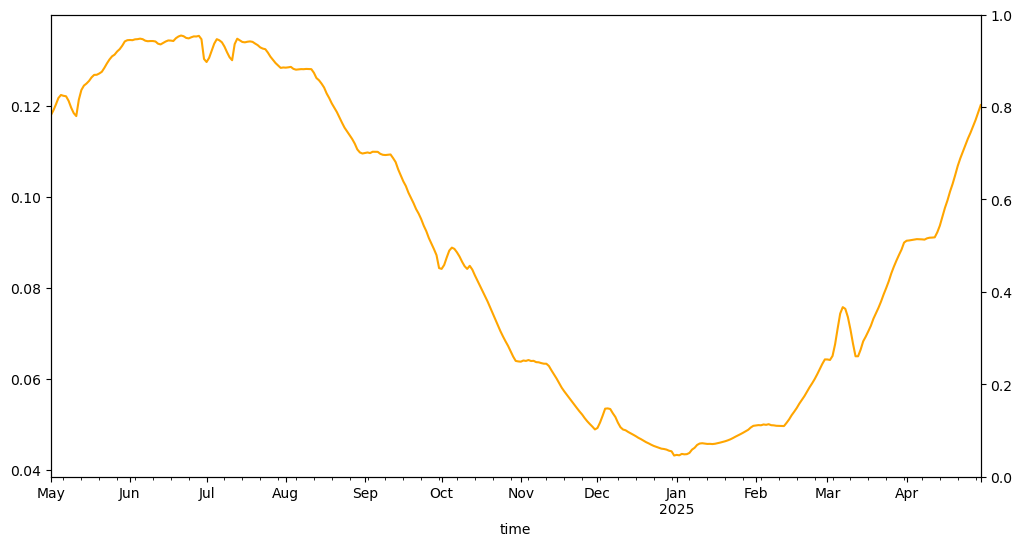

In [32]:
# Set up a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Set up the axes
ax1 = ax.twinx()

# Plot the solar climatology to see what is going on
daily_resampled_df_smooth["United_Kingdom_solar_cf_clim"].plot(
    ax=ax, label="Solar CF Climatology", color="orange"
)

# Plot the solar gen
# daily_resampled_df_smooth["United_Kingdom_solar_gen_clim"].plot(ax=ax1, label="Solar PV Gen", color="red")

In [33]:
# ------------------
# Convert wind from CFs to GW
# ------------------

# From https://www.renewableuk.com/energypulse/blog/uk-wind-and-global-offshore-wind-2024-in-review/
onshore_cap = 15.7
offshore_cap = 14.7

# From https://www.solarpowerportal.co.uk/uk-solar-capacity-up-5-9-year-on-year/#:~:text=As%20of%20the%20end%20of,(1GW)%20since%20April%202025.
solar_cap = 18.1  # GW, total solar capacity in the UK

# Convert the wind power generation from CFs to GW
daily_resampled_df_smooth["wp_gen_GW"] = daily_resampled_df_smooth["wp_gen"] * (
    onshore_cap + offshore_cap
)

# Process the climatology here
daily_resampled_df_smooth["wp_gen_GW_clim"] = daily_resampled_df_smooth[
    "United_Kingdom_wind_cf_clim"
] * (onshore_cap + offshore_cap)

# Convert the solar power generation from CFs to GW
daily_resampled_df_smooth["solar_PV_GW"] = (
    daily_resampled_df_smooth["solar_PV"] * solar_cap
)

# Process the climatology here
daily_resampled_df_smooth["solar_PV_GW_clim"] = (
    daily_resampled_df_smooth["United_Kingdom_solar_cf_clim"] * solar_cap
)

In [34]:
daily_resampled_df_smooth.columns

Index(['T2m', 'full_demand', 'wd_demand', 'solar_PV', 'ssrd', 'hh_ws',
       'wp_gen', 'doy', 'United_Kingdom_solar_cf_clim',
       'United_Kingdom_wind_cf_clim', 'United_Kingdom_demand_clim',
       'United_Kingdom_wd_demand_clim', 'UK_wind_speed_clim', 'UK_temp_clim',
       'United_Kingdom_wind_gen_clim', 'United_Kingdom_solar_gen_clim',
       'demand_net_wind_clim', 'wd_demand_net_wind_clim',
       'demand_net_renewables_clim', 'wd_demand_net_renewables_clim',
       'demandESO_clim', 'demandESO_net_wind_clim',
       'demandESO_net_renewables_clim', 'wp_gen_GW', 'wp_gen_GW_clim',
       'solar_PV_GW', 'solar_PV_GW_clim'],
      dtype='object')

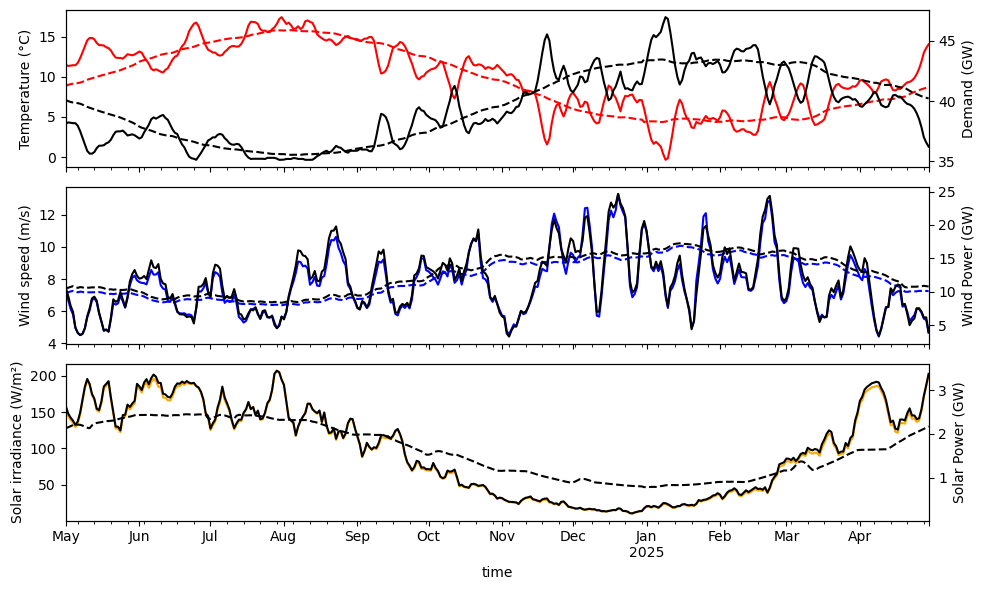

In [35]:
# Set up a figure with 3 rows and 1 column, shared x-axis
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Set up the axes
ax1 = axs[0]
ax1_b = axs[0].twinx()
ax2 = axs[1]
ax2_b = axs[1].twinx()
ax3 = axs[2]
ax3_b = axs[2].twinx()

# Plot the temperature in red on the first subplot
daily_resampled_df_smooth["wd_demand"].plot(ax=ax1_b, color="black", label="WD Demand")

# Plot the demand climatology in black on the first subplot
daily_resampled_df_smooth["United_Kingdom_wd_demand_clim"].plot(
    ax=ax1_b, color="black", linestyle="--", label="WD Demand Climatology"
)

# Plot the demand column
daily_resampled_df_smooth["T2m"].plot(ax=ax1, color="red", label="Temperature")

# Plot the temperature climatology in red on the first subplot
daily_resampled_df_smooth["UK_temp_clim"].plot(
    ax=ax1, color="red", linestyle="--", label="Temperature Climatology"
)

# Set the labels and title for the first subplot
ax1_b.set_ylabel("Demand (GW)")
ax1.set_ylabel("Temperature (°C)")

# Plot the wind power generation in black
daily_resampled_df_smooth["wp_gen_GW"].plot(ax=ax2_b, color="black", label="Wind Power")

# Plot the wp gen climatollogy as a dashed line
daily_resampled_df_smooth["wp_gen_GW_clim"].plot(
    ax=ax2_b, color="black", linestyle="--", label="Wind Power Climatology"
)

# Plot the wind power generation
daily_resampled_df_smooth["hh_ws"].plot(ax=ax2, color="blue", label="Wind speed")

# Plot the wind speed climatology in blue on the second subplot
daily_resampled_df_smooth["UK_wind_speed_clim"].plot(
    ax=ax2, color="blue", linestyle="--", label="Wind Speed Climatology"
)

# Set the labels
ax2.set_ylabel("Wind speed (m/s)")
# Set the labels for the wind power generation
ax2_b.set_ylabel("Wind Power (GW)")

# Plot the solar power generation in black
daily_resampled_df_smooth["solar_PV_GW"].plot(
    ax=ax3_b, color="black", label="Solar Power"
)

# plot the solar pv gw climatology as a dashed line
daily_resampled_df_smooth["solar_PV_GW_clim"].plot(
    ax=ax3_b, color="black", linestyle="--", label="Solar Power Climatology"
)

# Plot the solar power generation
daily_resampled_df_smooth["ssrd"].plot(ax=ax3, color="orange", label="Solar irradiance")

# Set the labels
ax3.set_ylabel("Solar irradiance (W/m²)")
# Set the labels for the solar power generation
ax3_b.set_ylabel("Solar Power (GW)")

# enforce a tight layout
plt.tight_layout()

#### Now calculate the demand net renewables anomalies ####

Quantify the rolling mean climatology of demand net renewables and calculate anomalies from this.

Perhaps highlight where the anomalies are positive or negative, and where they are large or small (e.g., 1, 2, 3 standard deviations from the mean).

------------

In [36]:
daily_resampled_df_smooth.columns

Index(['T2m', 'full_demand', 'wd_demand', 'solar_PV', 'ssrd', 'hh_ws',
       'wp_gen', 'doy', 'United_Kingdom_solar_cf_clim',
       'United_Kingdom_wind_cf_clim', 'United_Kingdom_demand_clim',
       'United_Kingdom_wd_demand_clim', 'UK_wind_speed_clim', 'UK_temp_clim',
       'United_Kingdom_wind_gen_clim', 'United_Kingdom_solar_gen_clim',
       'demand_net_wind_clim', 'wd_demand_net_wind_clim',
       'demand_net_renewables_clim', 'wd_demand_net_renewables_clim',
       'demandESO_clim', 'demandESO_net_wind_clim',
       'demandESO_net_renewables_clim', 'wp_gen_GW', 'wp_gen_GW_clim',
       'solar_PV_GW', 'solar_PV_GW_clim'],
      dtype='object')

In [37]:
# Calculate the demand net renewables climatology
daily_resampled_df_smooth["demand_net_renewables_clim"] = daily_resampled_df_smooth[
    "United_Kingdom_wd_demand_clim"
] - (
    daily_resampled_df_smooth["wp_gen_GW_clim"]
    + daily_resampled_df_smooth["solar_PV_GW_clim"]
)

# Caclulate the renewables net demand climatology
daily_resampled_df_smooth["renewables_net_demand_clim"] = (
    daily_resampled_df_smooth["wp_gen_GW_clim"]
    + daily_resampled_df_smooth["solar_PV_GW_clim"]
) - daily_resampled_df_smooth["United_Kingdom_wd_demand_clim"]

# Calculate the demand net renewables
daily_resampled_df_smooth["demand_net_renewables"] = daily_resampled_df_smooth[
    "wd_demand"
] - (daily_resampled_df_smooth["wp_gen_GW"] + daily_resampled_df_smooth["solar_PV_GW"])

# Caclulate the renewables net demand
daily_resampled_df_smooth["renewables_net_demand"] = (
    daily_resampled_df_smooth["wp_gen_GW"]
    + daily_resampled_df_smooth["solar_PV_GW"]
) - daily_resampled_df_smooth["wd_demand"]

In [38]:
# Calculate the demand anomalies
daily_resampled_df_smooth["wd_demand_anomaly"] = (
    daily_resampled_df_smooth["wd_demand"]
    - daily_resampled_df_smooth["United_Kingdom_wd_demand_clim"]
)

daily_resampled_df_smooth["wp_gen_anomaly"] = (
    daily_resampled_df_smooth["wp_gen_GW"] - daily_resampled_df_smooth["wp_gen_GW_clim"]
)

daily_resampled_df_smooth["solar_PV_anomaly"] = (
    daily_resampled_df_smooth["solar_PV_GW"]
    - daily_resampled_df_smooth["solar_PV_GW_clim"]
)

daily_resampled_df_smooth["demand_net_renewables_anomaly"] = (
    daily_resampled_df_smooth["demand_net_renewables"]
    - daily_resampled_df_smooth["demand_net_renewables_clim"]
)

# Caclulate the renewables net demand anomaly
daily_resampled_df_smooth["renewables_net_demand_anomaly"] = (
    daily_resampled_df_smooth["renewables_net_demand"]
    - daily_resampled_df_smooth["renewables_net_demand_clim"]
)

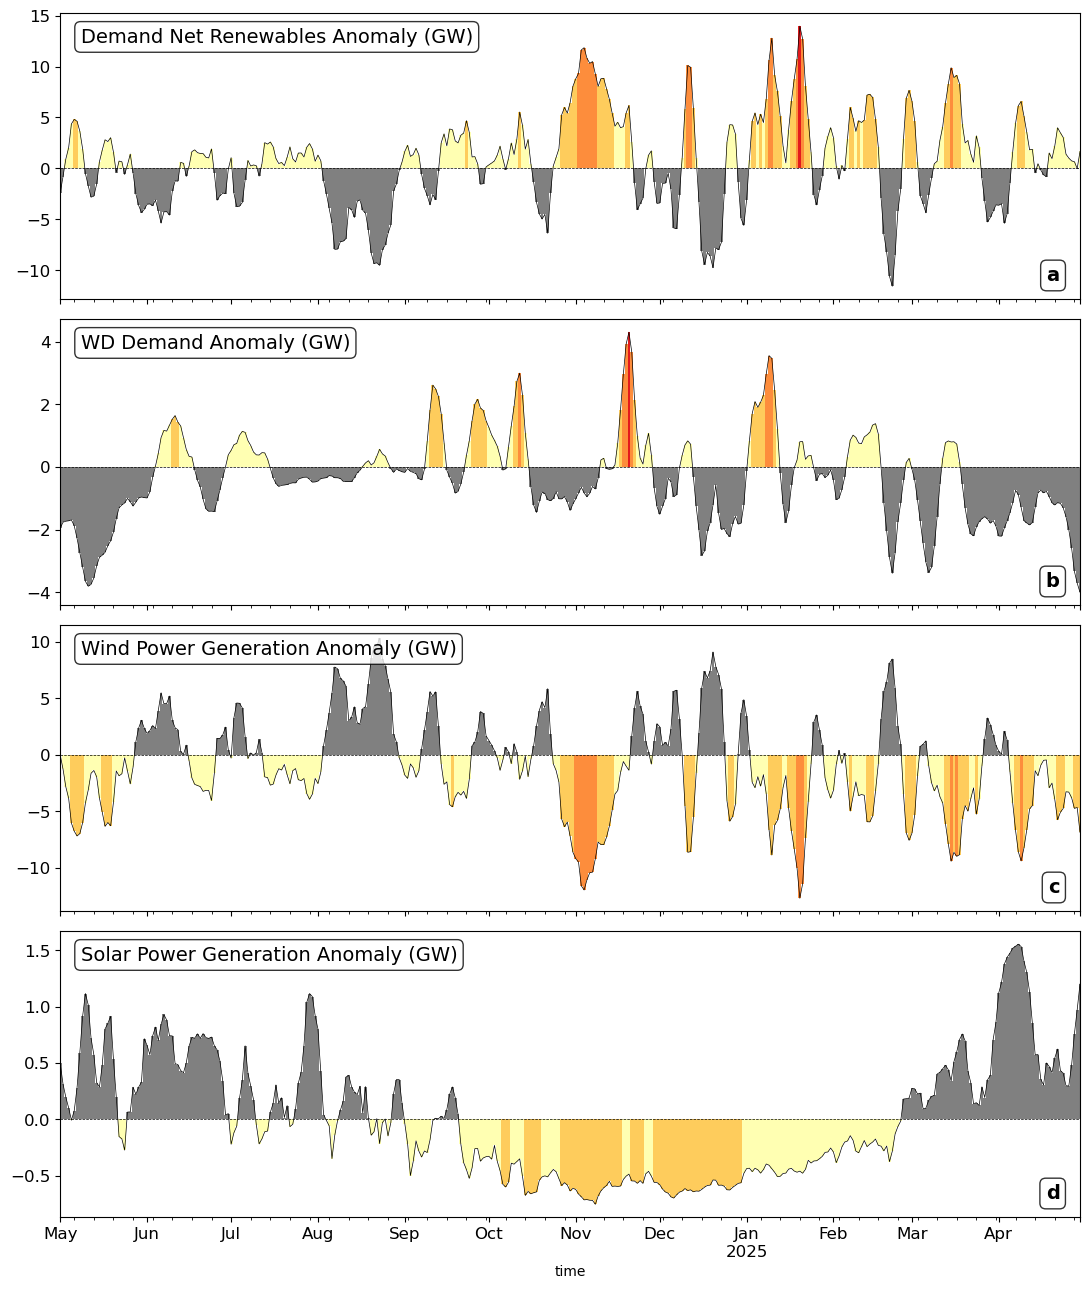

In [39]:
# Set up a figure with 4 rows and 1 column, shared x-axis
fig, axs = plt.subplots(4, 1, figsize=(11, 13), sharex=True)

# Set up the axes
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]
ax4 = axs[3]

# Set up the conditions for the left plot
conditions = [
    (
        (daily_resampled_df_smooth["demand_net_renewables_anomaly"] > 0)
        & (
            daily_resampled_df_smooth["demand_net_renewables_anomaly"]
            < 1 * np.std(daily_resampled_df_smooth["demand_net_renewables_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["demand_net_renewables_anomaly"]
            > 1 * np.std(daily_resampled_df_smooth["demand_net_renewables_anomaly"])
        )
        & (
            daily_resampled_df_smooth["demand_net_renewables_anomaly"]
            < 2 * np.std(daily_resampled_df_smooth["demand_net_renewables_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["demand_net_renewables_anomaly"]
            > 2 * np.std(daily_resampled_df_smooth["demand_net_renewables_anomaly"])
        )
        & (
            daily_resampled_df_smooth["demand_net_renewables_anomaly"]
            < 3 * np.std(daily_resampled_df_smooth["demand_net_renewables_anomaly"])
        )
    ),
    (
        daily_resampled_df_smooth["demand_net_renewables_anomaly"]
        > 3 * np.std(daily_resampled_df_smooth["demand_net_renewables_anomaly"])
    ),
    (daily_resampled_df_smooth["demand_net_renewables_anomaly"] < 0),
]

# Set up the conditions for the right upper plot (demand)
conditions_wind_gen = [
    (
        daily_resampled_df_smooth["wp_gen_anomaly"]
        >= -1 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
    )
    & (daily_resampled_df_smooth["wp_gen_anomaly"] < 0),
    (
        daily_resampled_df_smooth["wp_gen_anomaly"]
        >= -2 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
    )
    & (
        daily_resampled_df_smooth["wp_gen_anomaly"]
        < -1 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
    ),
    (
        daily_resampled_df_smooth["wp_gen_anomaly"]
        >= -3 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
    )
    & (
        daily_resampled_df_smooth["wp_gen_anomaly"]
        < -2 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
    ),
    (
        daily_resampled_df_smooth["wp_gen_anomaly"]
        <= -3 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
    ),
    (daily_resampled_df_smooth["wp_gen_anomaly"] > 0),
]

# set up the conditions for demand
conditions_demand = [
    (daily_resampled_df_smooth["wd_demand_anomaly"] > 0)
    & (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        < 1 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    ),
    (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        > 1 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    )
    & (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        < 2 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    ),
    (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        > 2 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    )
    & (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        < 3 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    ),
    (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        > 3 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    ),
    (daily_resampled_df_smooth["wd_demand_anomaly"] < 0),
]

# Set up the conditions for lower solar generation plot
conditions_solar_gen = [
    (
        daily_resampled_df_smooth["solar_PV_anomaly"]
        >= -1 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
    )
    & (daily_resampled_df_smooth["solar_PV_anomaly"] < 0),
    (
        daily_resampled_df_smooth["solar_PV_anomaly"]
        >= -2 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
    )
    & (
        daily_resampled_df_smooth["solar_PV_anomaly"]
        < -1 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
    ),
    (
        daily_resampled_df_smooth["solar_PV_anomaly"]
        >= -3 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
    )
    & (
        daily_resampled_df_smooth["solar_PV_anomaly"]
        < -2 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
    ),
    (
        daily_resampled_df_smooth["solar_PV_anomaly"]
        <= -3 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
    ),
    (daily_resampled_df_smooth["solar_PV_anomaly"] > 0),
]

# Set up the colors for the left plot
colors = [
    "#ffffb2",
    "#fecc5c",
    "#fd8d3c",
    "#e31a1c",
    "grey",
]

# Set up the colors for the right plot
daily_resampled_df_smooth["color_dnw"] = np.select(
    conditions,
    colors,
    default="grey",
)
daily_resampled_df_smooth["color_wp_gen"] = np.select(
    conditions_wind_gen,
    colors,
    default="grey",
)
daily_resampled_df_smooth["color_demand"] = np.select(
    conditions_demand,
    colors,
    default="grey",
)
daily_resampled_df_smooth["color_solar_gen"] = np.select(
    conditions_solar_gen,
    colors,
    default="grey",
)

# Plot the demand net renewables anomaly on the first plot
daily_resampled_df_smooth["demand_net_renewables_anomaly"].plot(
    ax=ax1, color='k', label="Demand Net Renewables Anomaly", linewidth=0.5
)
ax1.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["demand_net_renewables_anomaly"],
    color=daily_resampled_df_smooth["color_dnw"],
    width=1,
    label="Demand Net Renewables Anomaly",
)

# set a hline at 0
ax1.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Add variable name in text box (top left)
ax1.text(0.02, 0.95, "Demand Net Renewables Anomaly (GW)", 
         transform=ax1.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax1.text(0.98, 0.05, "a", transform=ax1.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Plot the demand anomaly on the second plot
daily_resampled_df_smooth["wd_demand_anomaly"].plot(
    ax=ax2, color='k', label="WD Demand Anomaly", linewidth=0.5
)
ax2.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["wd_demand_anomaly"],
    color=daily_resampled_df_smooth["color_demand"],
    width=1,
    label="WD Demand Anomaly",
)
# set a hline at 0
ax2.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Add variable name in text box (top left)
ax2.text(0.02, 0.95, "WD Demand Anomaly (GW)", 
         transform=ax2.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax2.text(0.98, 0.05, "b", transform=ax2.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Plot the wind power generation anomaly on the third plot
daily_resampled_df_smooth["wp_gen_anomaly"].plot(
    ax=ax3, color='k', label="Wind Power Generation Anomaly", linewidth=0.5
)
ax3.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["wp_gen_anomaly"],
    color=daily_resampled_df_smooth["color_wp_gen"],
    width=1,
    label="Wind Power Generation Anomaly",
)

# set a hline at 0
ax3.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Add variable name in text box (top left)
ax3.text(0.02, 0.95, "Wind Power Generation Anomaly (GW)", 
         transform=ax3.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax3.text(0.98, 0.05, "c", transform=ax3.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Plot the solar power generation anomaly on the fourth plot
daily_resampled_df_smooth["solar_PV_anomaly"].plot(
    ax=ax4, color='k', label="Solar Power Generation Anomaly", linewidth=0.5
)
ax4.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["solar_PV_anomaly"],
    color=daily_resampled_df_smooth["color_solar_gen"],
    width=1,
    label="Solar Power Generation Anomaly",
)

# set a hline at 0
ax4.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Add variable name in text box (top left)
ax4.text(0.02, 0.95, "Solar Power Generation Anomaly (GW)", 
         transform=ax4.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax4.text(0.98, 0.05, "d", transform=ax4.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Increase font sizes for better readability
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)

# Set a tight layout
plt.tight_layout()

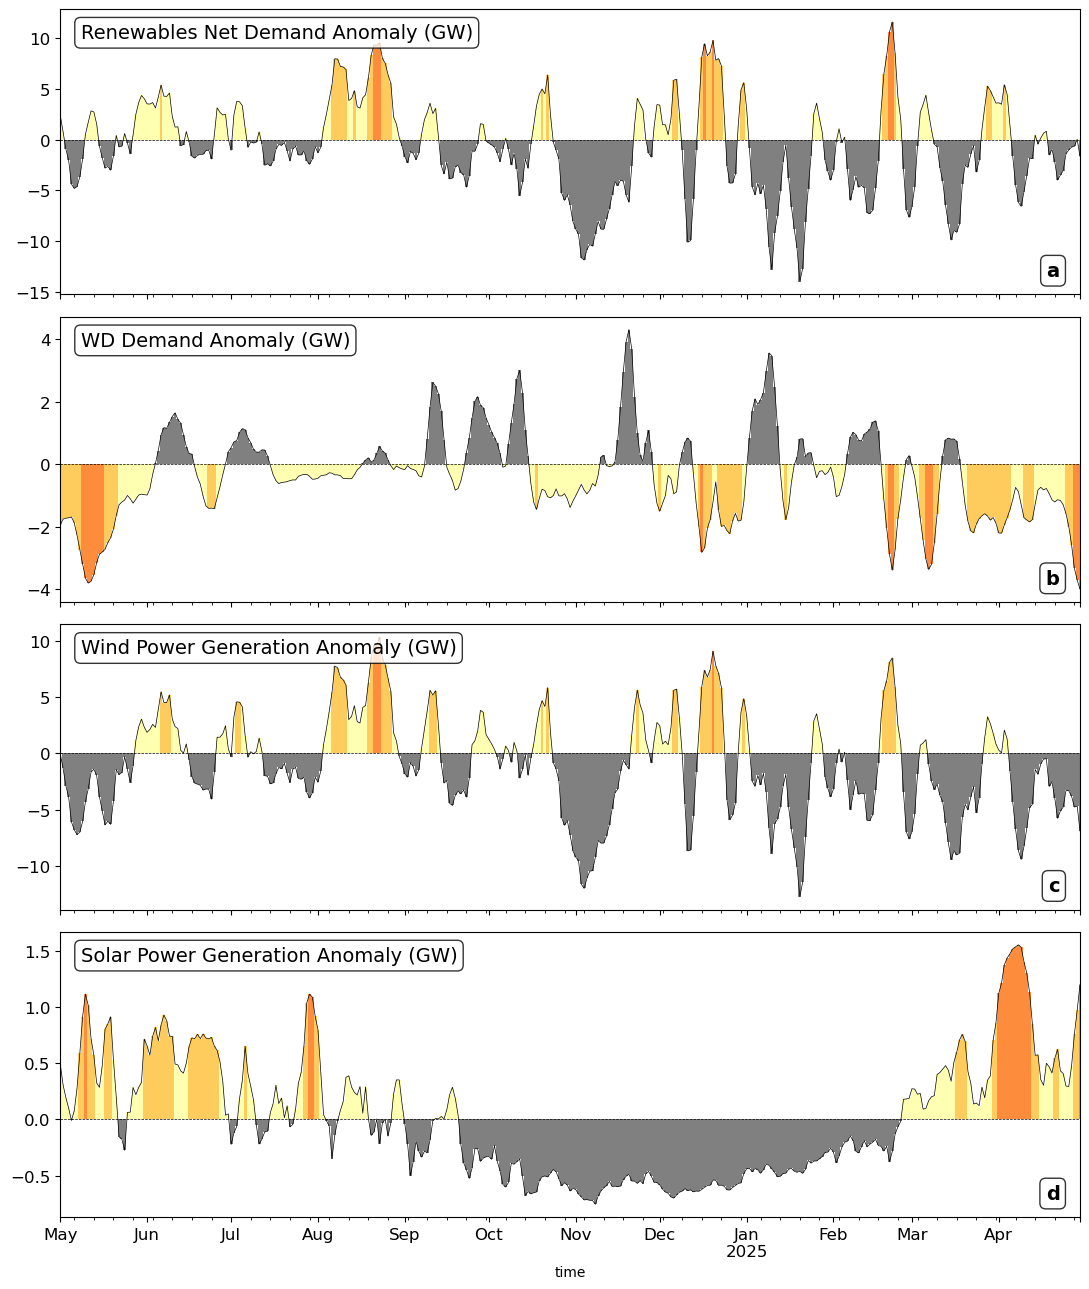

In [40]:
# ----------------
# Now the same but for the opposite problem - supply net demand
# ----------------

# Set up a figure with 4 rows and 1 column, shared x-axis
fig, axs = plt.subplots(4, 1, figsize=(11, 13), sharex=True)

# Set up the axes
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]
ax4 = axs[3]

# Set up the conditions for the left plot
conditions = [
    (
        (daily_resampled_df_smooth["renewables_net_demand_anomaly"] > 0)
        & (
            daily_resampled_df_smooth["renewables_net_demand_anomaly"]
            < 1 * np.std(daily_resampled_df_smooth["renewables_net_demand_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["renewables_net_demand_anomaly"]
            > 1 * np.std(daily_resampled_df_smooth["renewables_net_demand_anomaly"])
        )
        & (
            daily_resampled_df_smooth["renewables_net_demand_anomaly"]
            < 2 * np.std(daily_resampled_df_smooth["renewables_net_demand_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["renewables_net_demand_anomaly"]
            > 2 * np.std(daily_resampled_df_smooth["renewables_net_demand_anomaly"])
        )
        & (
            daily_resampled_df_smooth["renewables_net_demand_anomaly"]
            < 3 * np.std(daily_resampled_df_smooth["renewables_net_demand_anomaly"])
        )
    ),
    (
        daily_resampled_df_smooth["renewables_net_demand_anomaly"]
        > 3 * np.std(daily_resampled_df_smooth["renewables_net_demand_anomaly"])
    ),
    (daily_resampled_df_smooth["renewables_net_demand_anomaly"] < 0),
]

# Set up the conditions for wind gen, but positive anomalies
conditions_wind_gen = [
    (
        (daily_resampled_df_smooth["wp_gen_anomaly"] > 0)
        & (
            daily_resampled_df_smooth["wp_gen_anomaly"]
            < 1 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["wp_gen_anomaly"]
            > 1 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
        )
        & (
            daily_resampled_df_smooth["wp_gen_anomaly"]
            < 2 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["wp_gen_anomaly"]
            > 2 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
        )
        & (
            daily_resampled_df_smooth["wp_gen_anomaly"]
            < 3 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
        )
    ),
    (
        daily_resampled_df_smooth["wp_gen_anomaly"]
        > 3 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
    ),
    (daily_resampled_df_smooth["wp_gen_anomaly"] < 0),
]

# Set up the conditions for demand but negative
conditions_demand= [
    (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        >= -1 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    )
    & (daily_resampled_df_smooth["wd_demand_anomaly"] < 0),
    (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        >= -2 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    )
    & (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        < -1 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    ),
    (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        >= -3 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    )
    & (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        < -2 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    ),
    (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        < -3 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    ),
    (daily_resampled_df_smooth["wd_demand_anomaly"] >= 0),
]

# Set up the conditions for higher solar generation plot (positive anomalies)
conditions_solar_gen = [
    (
        (daily_resampled_df_smooth["solar_PV_anomaly"] > 0)
        & (
            daily_resampled_df_smooth["solar_PV_anomaly"]
            < 1 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["solar_PV_anomaly"]
            > 1 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
        )
        & (
            daily_resampled_df_smooth["solar_PV_anomaly"]
            < 2 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["solar_PV_anomaly"]
            > 2 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
        )
        & (
            daily_resampled_df_smooth["solar_PV_anomaly"]
            < 3 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
        )
    ),
    (
        daily_resampled_df_smooth["solar_PV_anomaly"]
        > 3 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
    ),
    (daily_resampled_df_smooth["solar_PV_anomaly"] < 0),
]

# Set up the colors for the left plot
colors = [
    "#ffffb2",
    "#fecc5c",
    "#fd8d3c",
    "#e31a1c",
    "grey",
]

# Set up the colors for the right plot
daily_resampled_df_smooth["color_dnw"] = np.select(
    conditions,
    colors,
    default="grey",
)
daily_resampled_df_smooth["color_wp_gen"] = np.select(
    conditions_wind_gen,
    colors,
    default="grey",
)
daily_resampled_df_smooth["color_demand"] = np.select(
    conditions_demand,
    colors,
    default="grey",
)
daily_resampled_df_smooth["color_solar_gen"] = np.select(
    conditions_solar_gen,
    colors,
    default="grey",
)

# Plot the demand net renewables anomaly on the first plot
daily_resampled_df_smooth["renewables_net_demand_anomaly"].plot(
    ax=ax1, color='k', label="Renewables net demand anomaly", linewidth=0.5
)
ax1.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["renewables_net_demand_anomaly"],
    color=daily_resampled_df_smooth["color_dnw"],
    width=1,
    label="Demand Net Renewables Anomaly",
)

# set a hline at 0
ax1.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Add variable name in text box (top left)
ax1.text(0.02, 0.95, "Renewables Net Demand Anomaly (GW)", 
         transform=ax1.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax1.text(0.98, 0.05, "a", transform=ax1.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Plot the demand anomaly on the second plot
daily_resampled_df_smooth["wd_demand_anomaly"].plot(
    ax=ax2, color='k', label="WD Demand Anomaly", linewidth=0.5
)
ax2.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["wd_demand_anomaly"],
    color=daily_resampled_df_smooth["color_demand"],
    width=1,
    label="WD Demand Anomaly",
)
# set a hline at 0
ax2.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Add variable name in text box (top left)
ax2.text(0.02, 0.95, "WD Demand Anomaly (GW)", 
         transform=ax2.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax2.text(0.98, 0.05, "b", transform=ax2.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Plot the wind power generation anomaly on the third plot
daily_resampled_df_smooth["wp_gen_anomaly"].plot(
    ax=ax3, color='k', label="Wind Power Generation Anomaly", linewidth=0.5
)
ax3.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["wp_gen_anomaly"],
    color=daily_resampled_df_smooth["color_wp_gen"],
    width=1,
    label="Wind Power Generation Anomaly",
)

# set a hline at 0
ax3.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Add variable name in text box (top left)
ax3.text(0.02, 0.95, "Wind Power Generation Anomaly (GW)", 
         transform=ax3.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax3.text(0.98, 0.05, "c", transform=ax3.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Plot the solar power generation anomaly on the fourth plot
daily_resampled_df_smooth["solar_PV_anomaly"].plot(
    ax=ax4, color='k', label="Solar Power Generation Anomaly", linewidth=0.5
)
ax4.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["solar_PV_anomaly"],
    color=daily_resampled_df_smooth["color_solar_gen"],
    width=1,
    label="Solar Power Generation Anomaly",
)

# set a hline at 0
ax4.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Add variable name in text box (top left)
ax4.text(0.02, 0.95, "Solar Power Generation Anomaly (GW)", 
         transform=ax4.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax4.text(0.98, 0.05, "d", transform=ax4.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Increase font sizes for better readability
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)

# Set a tight layout
plt.tight_layout()

### Iain data below ###

--------------------------

In [41]:
# Set up the path to the data
price_data_path = Path(
    "/home/users/benhutch/energy-sotcr-2024-2025/price_data/GB electricity data 2024-25.xlsx"
)

# Load the data from the Excel file
price_data = pd.read_excel(price_data_path, header=2)

In [42]:
# Convert the 'Date' column to datetime format
price_data["Date"] = pd.to_datetime(price_data["Date"])
# Convert the 'Time' column to datetime format
price_data["Time"] = pd.to_datetime(price_data["Time"], format="%H:%M:%S").dt.time

# Combine 'Date' and 'Time' into a single datetime column
price_data["Datetime"] = pd.to_datetime(
    price_data["Date"].astype(str) + " " + price_data["Time"].astype(str)
)

# Set the 'Datetime' column as the index
price_data.set_index("Datetime", inplace=True)

# drop the 'Date' and 'Time' columns as they are no longer needed
price_data.drop(columns=["Date", "Time"], inplace=True)

In [43]:
# Aggregate the data to daily frequency, taking the means
price_data_daily = price_data.resample("D").mean()

# take a rolling mean over 5 days
price_data_daily_smoothed = price_data_daily.rolling(
    window=5, center=True, min_periods=1
).mean()

In [44]:
# convert demand to GW
price_data_daily_smoothed["Demand (GW)"] = (
    price_data_daily_smoothed["Demand (MW)"] / 1000
)
# Convert wind and solar generation to GW
price_data_daily_smoothed["Wind (GW)"] = price_data_daily_smoothed["Wind"] / 1000
price_data_daily_smoothed["Solar (GW)"] = price_data_daily_smoothed["Solar"] / 1000

In [45]:
# remove the name for the index
price_data_daily_smoothed.index.name = None

In [46]:
price_data_daily_smoothed.columns

Index(['Nuclear', 'Biomass', 'Imports', 'Hydro', 'Wind', 'Solar', 'Gas',
       'Coal', 'Peaking', 'French', 'Dutch', 'Irish', 'Belgian', 'Norwegian',
       'Danish', 'Storage', 'Gross Imports', 'Gross Exports', 'Demand (MW)',
       'Demand Net (MW)', 'Fossil (MW)', 'Carbon (tCO₂/hr)', 'Carbon (g/kWh)',
       'Day Ahead', 'Realtime', 'Balancing', 'Temper-ature (°C)',
       'Wind Curtailed', 'Wind Available', 'Demand (GW)', 'Wind (GW)',
       'Solar (GW)'],
      dtype='object')

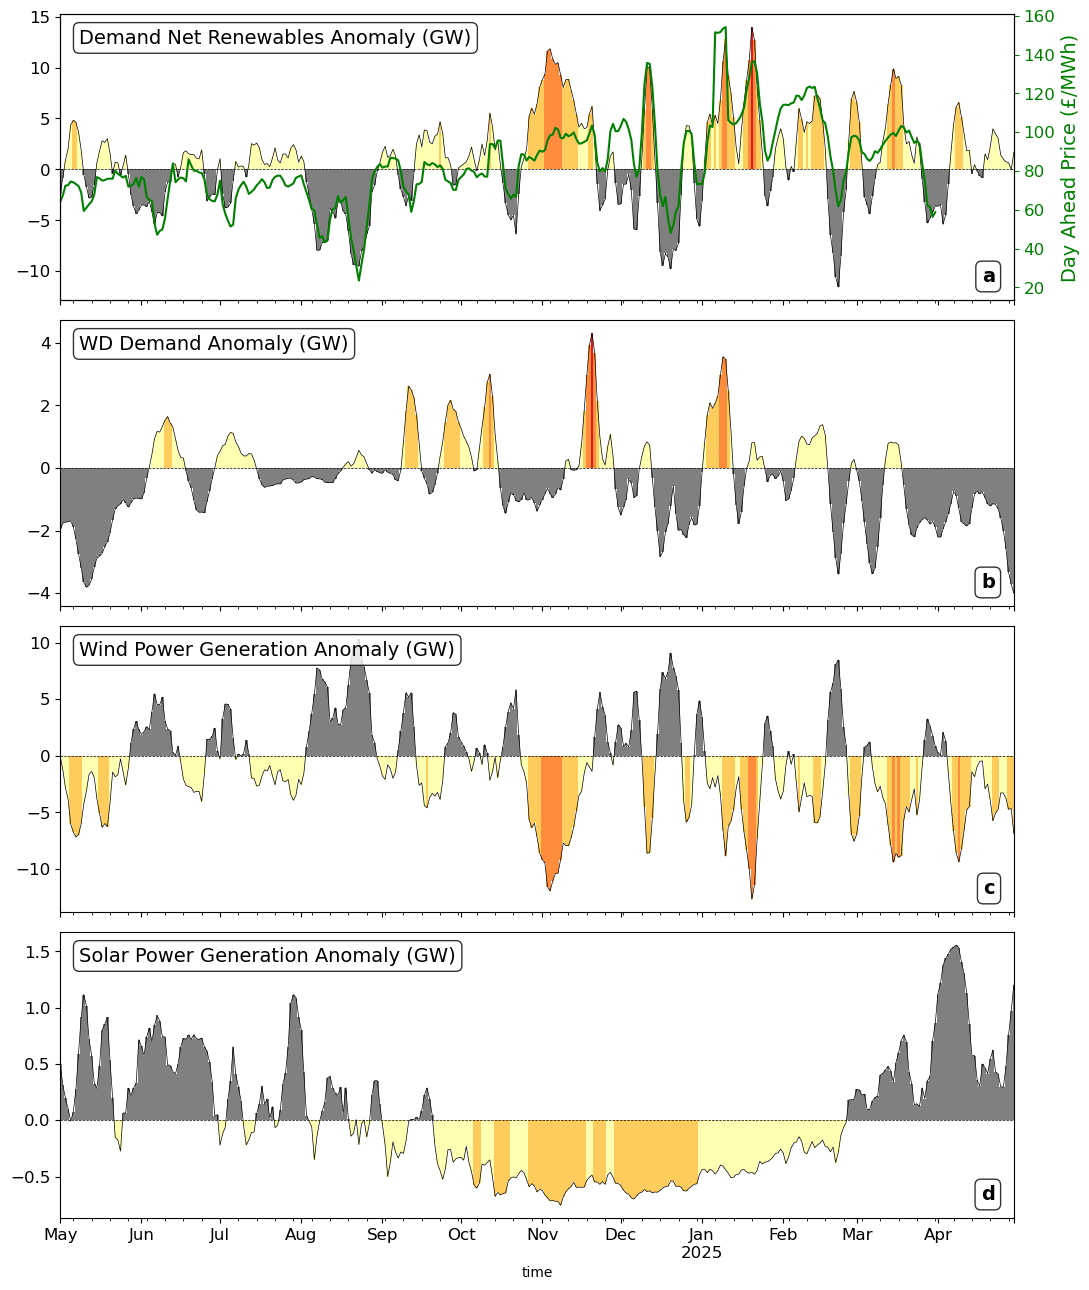

In [49]:
# -----------------------
# Now plot demand net renewables with price data
# -----------------------

# Set up a figure with 4 rows and 1 column, shared x-axis
fig, axs = plt.subplots(4, 1, figsize=(11, 13), sharex=True)

# Set up the axes
ax1 = axs[0]
ax1_b = ax1.twinx()  # Create a twin y-axis for the first plot
ax2 = axs[1]
ax3 = axs[2]
ax4 = axs[3]

# Set up the conditions for the left plot
conditions = [
    (
        (daily_resampled_df_smooth["demand_net_renewables_anomaly"] > 0)
        & (
            daily_resampled_df_smooth["demand_net_renewables_anomaly"]
            < 1 * np.std(daily_resampled_df_smooth["demand_net_renewables_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["demand_net_renewables_anomaly"]
            > 1 * np.std(daily_resampled_df_smooth["demand_net_renewables_anomaly"])
        )
        & (
            daily_resampled_df_smooth["demand_net_renewables_anomaly"]
            < 2 * np.std(daily_resampled_df_smooth["demand_net_renewables_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["demand_net_renewables_anomaly"]
            > 2 * np.std(daily_resampled_df_smooth["demand_net_renewables_anomaly"])
        )
        & (
            daily_resampled_df_smooth["demand_net_renewables_anomaly"]
            < 3 * np.std(daily_resampled_df_smooth["demand_net_renewables_anomaly"])
        )
    ),
    (
        daily_resampled_df_smooth["demand_net_renewables_anomaly"]
        > 3 * np.std(daily_resampled_df_smooth["demand_net_renewables_anomaly"])
    ),
    (daily_resampled_df_smooth["demand_net_renewables_anomaly"] < 0),
]

# Set up the conditions for the right upper plot (demand)
conditions_wind_gen = [
    (
        daily_resampled_df_smooth["wp_gen_anomaly"]
        >= -1 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
    )
    & (daily_resampled_df_smooth["wp_gen_anomaly"] < 0),
    (
        daily_resampled_df_smooth["wp_gen_anomaly"]
        >= -2 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
    )
    & (
        daily_resampled_df_smooth["wp_gen_anomaly"]
        < -1 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
    ),
    (
        daily_resampled_df_smooth["wp_gen_anomaly"]
        >= -3 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
    )
    & (
        daily_resampled_df_smooth["wp_gen_anomaly"]
        < -2 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
    ),
    (
        daily_resampled_df_smooth["wp_gen_anomaly"]
        <= -3 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
    ),
    (daily_resampled_df_smooth["wp_gen_anomaly"] > 0),
]

# set up the conditions for demand
conditions_demand = [
    (daily_resampled_df_smooth["wd_demand_anomaly"] > 0)
    & (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        < 1 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    ),
    (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        > 1 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    )
    & (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        < 2 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    ),
    (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        > 2 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    )
    & (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        < 3 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    ),
    (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        > 3 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    ),
    (daily_resampled_df_smooth["wd_demand_anomaly"] < 0),
]

# Set up the conditions for lower solar generation plot
conditions_solar_gen = [
    (
        daily_resampled_df_smooth["solar_PV_anomaly"]
        >= -1 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
    )
    & (daily_resampled_df_smooth["solar_PV_anomaly"] < 0),
    (
        daily_resampled_df_smooth["solar_PV_anomaly"]
        >= -2 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
    )
    & (
        daily_resampled_df_smooth["solar_PV_anomaly"]
        < -1 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
    ),
    (
        daily_resampled_df_smooth["solar_PV_anomaly"]
        >= -3 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
    )
    & (
        daily_resampled_df_smooth["solar_PV_anomaly"]
        < -2 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
    ),
    (
        daily_resampled_df_smooth["solar_PV_anomaly"]
        <= -3 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
    ),
    (daily_resampled_df_smooth["solar_PV_anomaly"] > 0),
]

# Set up the colors for the left plot
colors = [
    "#ffffb2",
    "#fecc5c",
    "#fd8d3c",
    "#e31a1c",
    "grey",
]

# Set up the colors for the right plot
daily_resampled_df_smooth["color_dnw"] = np.select(
    conditions,
    colors,
    default="grey",
)
daily_resampled_df_smooth["color_wp_gen"] = np.select(
    conditions_wind_gen,
    colors,
    default="grey",
)
daily_resampled_df_smooth["color_demand"] = np.select(
    conditions_demand,
    colors,
    default="grey",
)
daily_resampled_df_smooth["color_solar_gen"] = np.select(
    conditions_solar_gen,
    colors,
    default="grey",
)

# Plot the demand net renewables anomaly on the first plot
daily_resampled_df_smooth["demand_net_renewables_anomaly"].plot(
    ax=ax1, color='k', label="Demand Net Renewables Anomaly", linewidth=0.5
)
ax1.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["demand_net_renewables_anomaly"],
    color=daily_resampled_df_smooth["color_dnw"],
    width=1,
    label="Demand Net Renewables Anomaly",
)

# set a hline at 0
ax1.axhline(0, color="black", linestyle="--", linewidth=0.5)

# On the second axis, plto the day head price
price_data_daily_smoothed["Day Ahead"].plot(
    ax=ax1_b, color='green', label="Day Ahead", linewidth=1.5,
)

# Set the y-axis label for the second axis
ax1_b.set_ylabel("Day Ahead Price (£/MWh)", fontsize=14, color='green')
ax1_b.tick_params(axis='y', labelsize=12, colors='green')
# Set the y-axis label for the first axis

# Add variable name in text box (top left)
ax1.text(0.02, 0.95, "Demand Net Renewables Anomaly (GW)", 
         transform=ax1.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax1.text(0.98, 0.05, "a", transform=ax1.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Plot the demand anomaly on the second plot
daily_resampled_df_smooth["wd_demand_anomaly"].plot(
    ax=ax2, color='k', label="WD Demand Anomaly", linewidth=0.5
)
ax2.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["wd_demand_anomaly"],
    color=daily_resampled_df_smooth["color_demand"],
    width=1,
    label="WD Demand Anomaly",
)
# set a hline at 0
ax2.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Add variable name in text box (top left)
ax2.text(0.02, 0.95, "WD Demand Anomaly (GW)", 
         transform=ax2.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax2.text(0.98, 0.05, "b", transform=ax2.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Plot the wind power generation anomaly on the third plot
daily_resampled_df_smooth["wp_gen_anomaly"].plot(
    ax=ax3, color='k', label="Wind Power Generation Anomaly", linewidth=0.5
)
ax3.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["wp_gen_anomaly"],
    color=daily_resampled_df_smooth["color_wp_gen"],
    width=1,
    label="Wind Power Generation Anomaly",
)

# set a hline at 0
ax3.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Add variable name in text box (top left)
ax3.text(0.02, 0.95, "Wind Power Generation Anomaly (GW)", 
         transform=ax3.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax3.text(0.98, 0.05, "c", transform=ax3.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Plot the solar power generation anomaly on the fourth plot
daily_resampled_df_smooth["solar_PV_anomaly"].plot(
    ax=ax4, color='k', label="Solar Power Generation Anomaly", linewidth=0.5
)
ax4.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["solar_PV_anomaly"],
    color=daily_resampled_df_smooth["color_solar_gen"],
    width=1,
    label="Solar Power Generation Anomaly",
)

# set a hline at 0
ax4.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Add variable name in text box (top left)
ax4.text(0.02, 0.95, "Solar Power Generation Anomaly (GW)", 
         transform=ax4.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax4.text(0.98, 0.05, "d", transform=ax4.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Increase font sizes for better readability
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)

# Set a tight layout
plt.tight_layout()

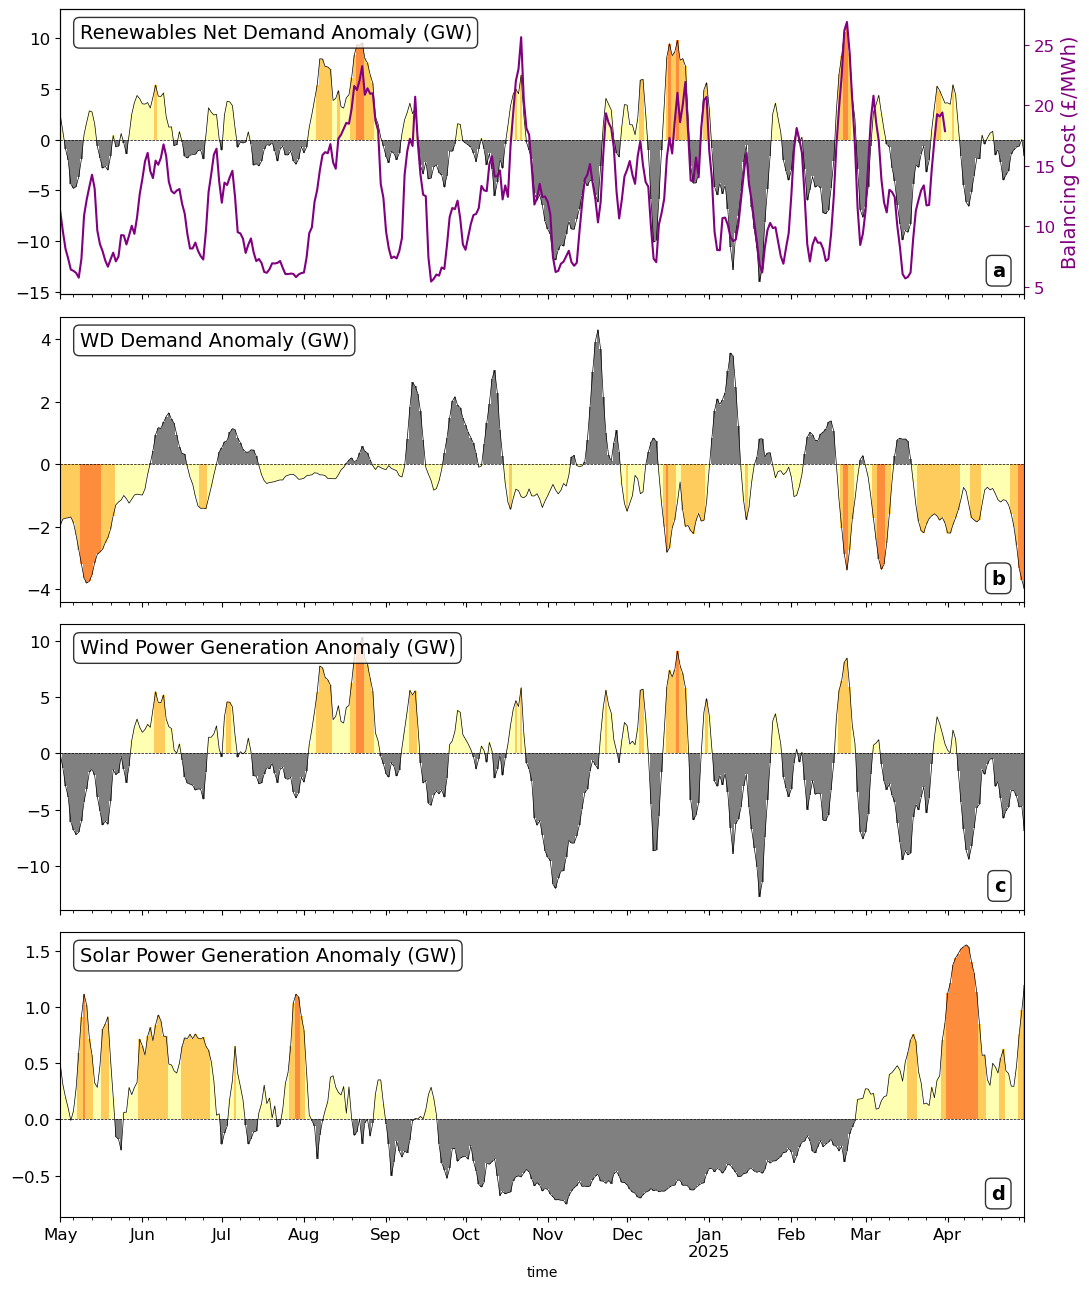

In [50]:
# ----------------
# Now the same but for the opposite problem - supply net demand
# ----------------

# Set up a figure with 4 rows and 1 column, shared x-axis
fig, axs = plt.subplots(4, 1, figsize=(11, 13), sharex=True)

# Set up the axes
ax1 = axs[0]
ax1_b = ax1.twinx()  # Create a twin y-axis for the first plot
ax2 = axs[1]
ax3 = axs[2]
ax4 = axs[3]

# Set up the conditions for the left plot
conditions = [
    (
        (daily_resampled_df_smooth["renewables_net_demand_anomaly"] > 0)
        & (
            daily_resampled_df_smooth["renewables_net_demand_anomaly"]
            < 1 * np.std(daily_resampled_df_smooth["renewables_net_demand_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["renewables_net_demand_anomaly"]
            > 1 * np.std(daily_resampled_df_smooth["renewables_net_demand_anomaly"])
        )
        & (
            daily_resampled_df_smooth["renewables_net_demand_anomaly"]
            < 2 * np.std(daily_resampled_df_smooth["renewables_net_demand_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["renewables_net_demand_anomaly"]
            > 2 * np.std(daily_resampled_df_smooth["renewables_net_demand_anomaly"])
        )
        & (
            daily_resampled_df_smooth["renewables_net_demand_anomaly"]
            < 3 * np.std(daily_resampled_df_smooth["renewables_net_demand_anomaly"])
        )
    ),
    (
        daily_resampled_df_smooth["renewables_net_demand_anomaly"]
        > 3 * np.std(daily_resampled_df_smooth["renewables_net_demand_anomaly"])
    ),
    (daily_resampled_df_smooth["renewables_net_demand_anomaly"] < 0),
]

# Set up the conditions for wind gen, but positive anomalies
conditions_wind_gen = [
    (
        (daily_resampled_df_smooth["wp_gen_anomaly"] > 0)
        & (
            daily_resampled_df_smooth["wp_gen_anomaly"]
            < 1 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["wp_gen_anomaly"]
            > 1 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
        )
        & (
            daily_resampled_df_smooth["wp_gen_anomaly"]
            < 2 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["wp_gen_anomaly"]
            > 2 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
        )
        & (
            daily_resampled_df_smooth["wp_gen_anomaly"]
            < 3 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
        )
    ),
    (
        daily_resampled_df_smooth["wp_gen_anomaly"]
        > 3 * np.std(daily_resampled_df_smooth["wp_gen_anomaly"])
    ),
    (daily_resampled_df_smooth["wp_gen_anomaly"] < 0),
]

# Set up the conditions for demand but negative
conditions_demand= [
    (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        >= -1 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    )
    & (daily_resampled_df_smooth["wd_demand_anomaly"] < 0),
    (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        >= -2 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    )
    & (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        < -1 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    ),
    (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        >= -3 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    )
    & (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        < -2 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    ),
    (
        daily_resampled_df_smooth["wd_demand_anomaly"]
        < -3 * np.std(daily_resampled_df_smooth["wd_demand_anomaly"])
    ),
    (daily_resampled_df_smooth["wd_demand_anomaly"] >= 0),
]

# Set up the conditions for higher solar generation plot (positive anomalies)
conditions_solar_gen = [
    (
        (daily_resampled_df_smooth["solar_PV_anomaly"] > 0)
        & (
            daily_resampled_df_smooth["solar_PV_anomaly"]
            < 1 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["solar_PV_anomaly"]
            > 1 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
        )
        & (
            daily_resampled_df_smooth["solar_PV_anomaly"]
            < 2 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
        )
    ),
    (
        (
            daily_resampled_df_smooth["solar_PV_anomaly"]
            > 2 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
        )
        & (
            daily_resampled_df_smooth["solar_PV_anomaly"]
            < 3 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
        )
    ),
    (
        daily_resampled_df_smooth["solar_PV_anomaly"]
        > 3 * np.std(daily_resampled_df_smooth["solar_PV_anomaly"])
    ),
    (daily_resampled_df_smooth["solar_PV_anomaly"] < 0),
]

# Set up the colors for the left plot
colors = [
    "#ffffb2",
    "#fecc5c",
    "#fd8d3c",
    "#e31a1c",
    "grey",
]

# Set up the colors for the right plot
daily_resampled_df_smooth["color_dnw"] = np.select(
    conditions,
    colors,
    default="grey",
)
daily_resampled_df_smooth["color_wp_gen"] = np.select(
    conditions_wind_gen,
    colors,
    default="grey",
)
daily_resampled_df_smooth["color_demand"] = np.select(
    conditions_demand,
    colors,
    default="grey",
)
daily_resampled_df_smooth["color_solar_gen"] = np.select(
    conditions_solar_gen,
    colors,
    default="grey",
)

# Plot the demand net renewables anomaly on the first plot
daily_resampled_df_smooth["renewables_net_demand_anomaly"].plot(
    ax=ax1, color='k', label="Renewables net demand anomaly", linewidth=0.5
)
ax1.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["renewables_net_demand_anomaly"],
    color=daily_resampled_df_smooth["color_dnw"],
    width=1,
    label="Demand Net Renewables Anomaly",
)

# set a hline at 0
ax1.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Plot the balancing cost in purple
price_data_daily_smoothed["Balancing"].plot(
    ax=ax1_b, color='purple', label="Balancing Cost", linewidth=1.5,
)

# Set the y-axis label for the second axis
ax1_b.set_ylabel("Balancing Cost (£/MWh)", fontsize=14, color='purple')
ax1_b.tick_params(axis='y', labelsize=12, colors='purple')

# Add variable name in text box (top left)
ax1.text(0.02, 0.95, "Renewables Net Demand Anomaly (GW)", 
         transform=ax1.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax1.text(0.98, 0.05, "a", transform=ax1.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Plot the demand anomaly on the second plot
daily_resampled_df_smooth["wd_demand_anomaly"].plot(
    ax=ax2, color='k', label="WD Demand Anomaly", linewidth=0.5
)
ax2.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["wd_demand_anomaly"],
    color=daily_resampled_df_smooth["color_demand"],
    width=1,
    label="WD Demand Anomaly",
)
# set a hline at 0
ax2.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Add variable name in text box (top left)
ax2.text(0.02, 0.95, "WD Demand Anomaly (GW)", 
         transform=ax2.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax2.text(0.98, 0.05, "b", transform=ax2.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Plot the wind power generation anomaly on the third plot
daily_resampled_df_smooth["wp_gen_anomaly"].plot(
    ax=ax3, color='k', label="Wind Power Generation Anomaly", linewidth=0.5
)
ax3.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["wp_gen_anomaly"],
    color=daily_resampled_df_smooth["color_wp_gen"],
    width=1,
    label="Wind Power Generation Anomaly",
)

# set a hline at 0
ax3.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Add variable name in text box (top left)
ax3.text(0.02, 0.95, "Wind Power Generation Anomaly (GW)", 
         transform=ax3.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax3.text(0.98, 0.05, "c", transform=ax3.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Plot the solar power generation anomaly on the fourth plot
daily_resampled_df_smooth["solar_PV_anomaly"].plot(
    ax=ax4, color='k', label="Solar Power Generation Anomaly", linewidth=0.5
)
ax4.bar(
    daily_resampled_df_smooth.index,
    daily_resampled_df_smooth["solar_PV_anomaly"],
    color=daily_resampled_df_smooth["color_solar_gen"],
    width=1,
    label="Solar Power Generation Anomaly",
)

# set a hline at 0
ax4.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Add variable name in text box (top left)
ax4.text(0.02, 0.95, "Solar Power Generation Anomaly (GW)", 
         transform=ax4.transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Add panel label in text box (bottom right)
ax4.text(0.98, 0.05, "d", transform=ax4.transAxes, fontsize=14, 
         verticalalignment='bottom', horizontalalignment='right', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Increase font sizes for better readability
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)

# Set a tight layout
plt.tight_layout()

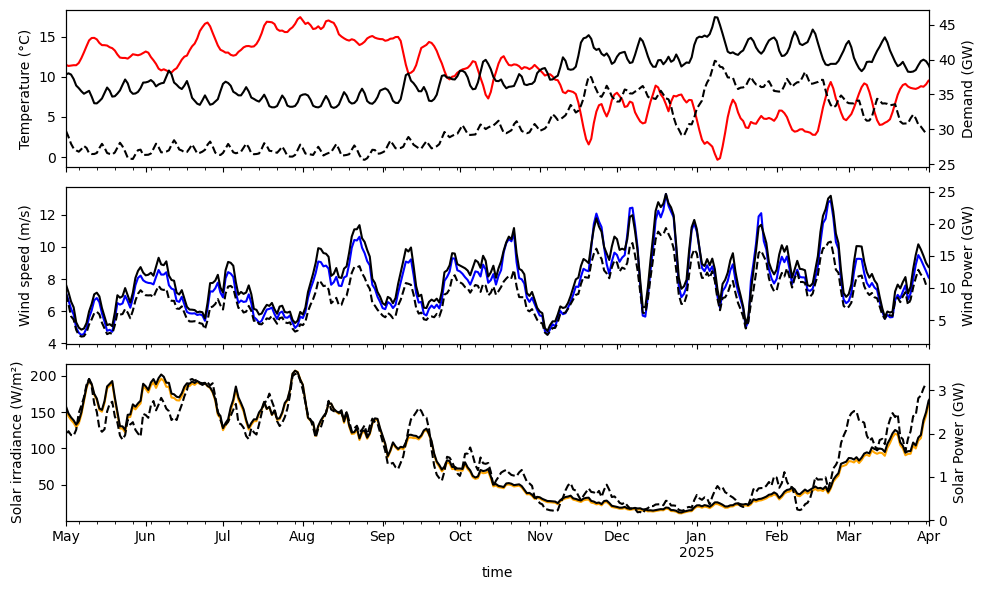

In [ ]:
# Set up a figure with 3 rows and 1 column, shared x-axis
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

start_date = pd.to_datetime("2024-05-01")
end_date = pd.to_datetime("2025-04-01")

# Set up the axes
ax1 = axs[0]
ax1_b = axs[0].twinx()
ax2 = axs[1]
ax2_b = axs[1].twinx()
ax3 = axs[2]
ax3_b = axs[2].twinx()

# Plot the temperature in red on the first subplot
daily_resampled_df_smooth["full_demand"].plot(
    ax=ax1_b, color="black", label="WD Demand"
)

# Plot iain's demand data as a dashed black line
price_data_daily_smoothed["Demand (GW)"].plot(
    ax=ax1_b, color="black", linestyle="--", label="Drax Demand"
)

# Plot the demand column
daily_resampled_df_smooth["T2m"].plot(ax=ax1, color="red", label="Temperature")

# Set the labels and title for the first subplot
ax1_b.set_ylabel("Demand (GW)")
ax1.set_ylabel("Temperature (°C)")

# Plot the wind power generation in black
daily_resampled_df_smooth["wp_gen_GW"].plot(ax=ax2_b, color="black", label="Wind Power")

# Plot the wind power generation
price_data_daily_smoothed["Wind (GW)"].plot(
    ax=ax2_b, color="black", label="Drax Wind Power", linestyle="--"
)

# Plot the wind power generation
daily_resampled_df_smooth["hh_ws"].plot(ax=ax2, color="blue", label="Wind speed")

# Set the labels
ax2.set_ylabel("Wind speed (m/s)")
# Set the labels for the wind power generation
ax2_b.set_ylabel("Wind Power (GW)")

# Plot the solar power generation in black
daily_resampled_df_smooth["solar_PV_GW"].plot(
    ax=ax3_b, color="black", label="Solar Power"
)

# Plot the solar power generation
price_data_daily_smoothed["Solar (GW)"].plot(
    ax=ax3_b, color="black", label="Drax Solar Power", linestyle="--"
)

# Plot the solar power generation
daily_resampled_df_smooth["ssrd"].plot(ax=ax3, color="orange", label="Solar irradiance")

# Set the labels
ax3.set_ylabel("Solar irradiance (W/m²)")
# Set the labels for the solar power generation
ax3_b.set_ylabel("Solar Power (GW)")

# Limit the x-axis to the specified date range
ax1.set_xlim(start_date, end_date)
ax2.set_xlim(start_date, end_date)
ax3.set_xlim(start_date, end_date)

# enforce a tight layout
plt.tight_layout()

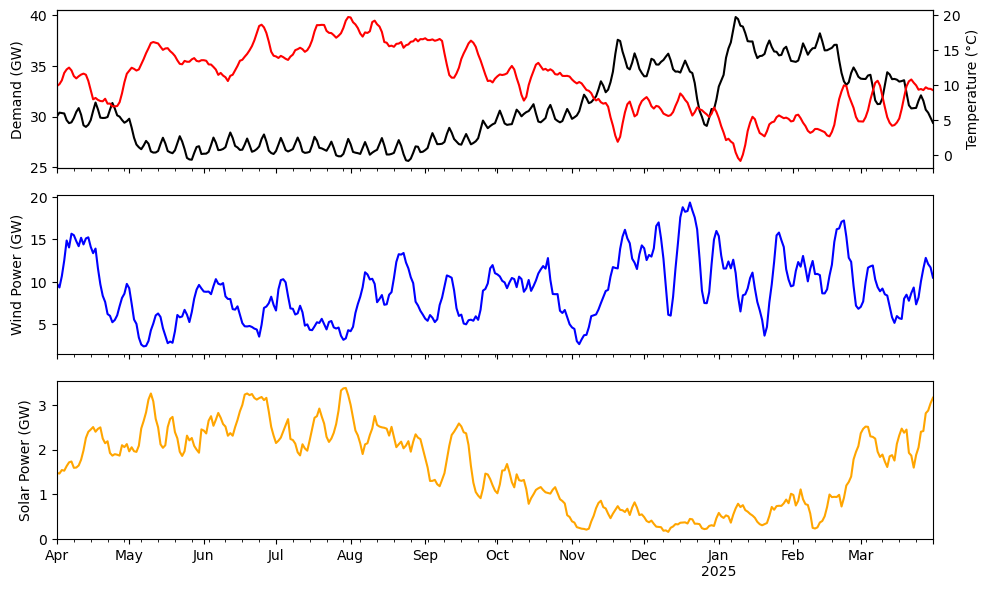

In [ ]:
# Set up a figure with 3 rows and 1 column, shared x-axis
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Set up the axes
ax1 = axs[0]
ax1_b = axs[0].twinx()
ax2 = axs[1]
ax3 = axs[2]

# Plot the demand column
price_data_daily_smoothed["Demand (GW)"].plot(ax=ax1, color="k", label="Demand")

# Plot the temperature in red on the first subplot
price_data_daily_smoothed["Temper-ature (°C)"].plot(
    ax=ax1_b, color="red", label="Temperature"
)

# Set the labels and title for the first subplot
ax1.set_ylabel("Demand (GW)")
ax1_b.set_ylabel("Temperature (°C)")

# Plot the wind power generation
price_data_daily_smoothed["Wind (GW)"].plot(ax=ax2, color="blue", label="Wind Power")

# Set the labels
ax2.set_ylabel("Wind Power (GW)")

# Plot the solar power generation
price_data_daily_smoothed["Solar (GW)"].plot(
    ax=ax3, color="orange", label="Solar Power"
)

# Set the labels
ax3.set_ylabel("Solar Power (GW)")

# enforce a tight layout
plt.tight_layout()

In [ ]:
# Now quantify demand net renewbles
price_data_daily_smoothed["Demand Net Renewables (GW)"] = price_data_daily_smoothed[
    "Demand (GW)"
] - (price_data_daily_smoothed["Wind (GW)"] + price_data_daily_smoothed["Solar (GW)"])

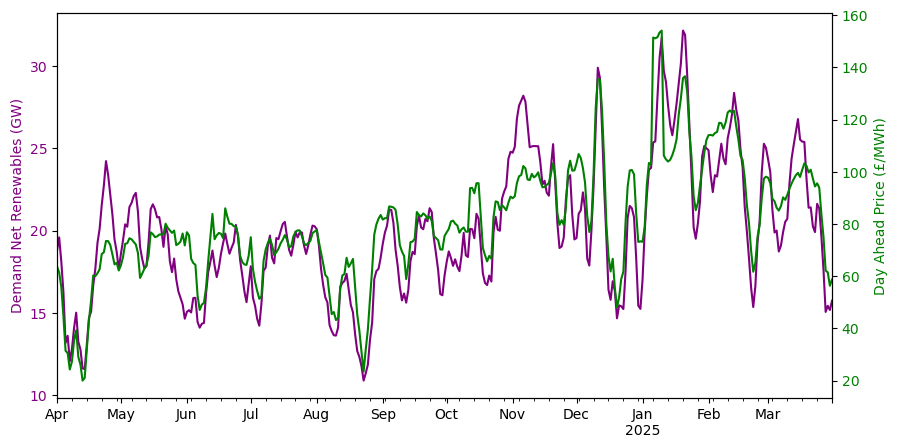

In [ ]:
# Set up a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the demand net renewables
price_data_daily_smoothed["Demand Net Renewables (GW)"].plot(
    ax=ax, color="purple", label="Demand Net Renewables"
)

# Set the labels and title
ax.set_ylabel("Demand Net Renewables (GW)", color="purple")

# Duplicate the x-axis for the date
ax2 = ax.twinx()

# Plot Day ahead prices on the secondary x-axis
price_data_daily_smoothed["Day Ahead"].plot(
    ax=ax2, color="green", label="Day Ahead Price"
)

# Set the labels for the secondary y-axis
ax2.set_ylabel("Day Ahead Price (£/MWh)", color="green")

# set the ticks the same color as the line being plotted
ax2.tick_params(axis="y", labelcolor="green")
ax.tick_params(axis="y", labelcolor="purple")

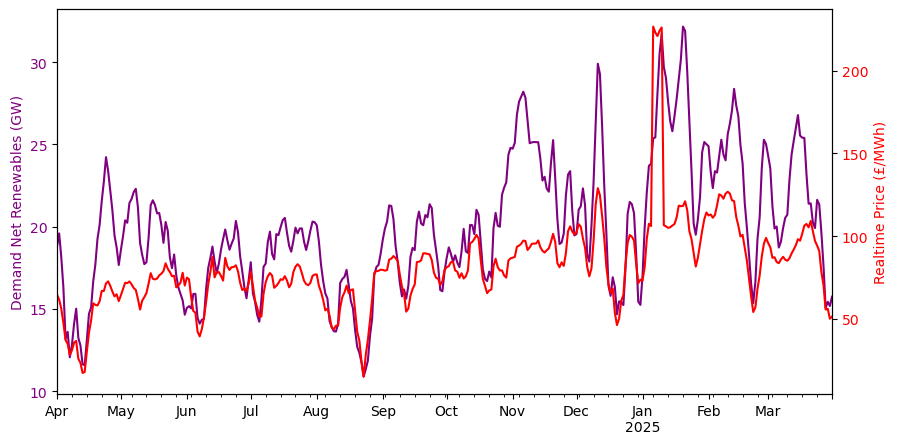

In [ ]:
# Set up a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the demand net renewables
price_data_daily_smoothed["Demand Net Renewables (GW)"].plot(
    ax=ax, color="purple", label="Demand Net Renewables"
)

# Set the labels and title
ax.set_ylabel("Demand Net Renewables (GW)", color="purple")

# Duplicate the x-axis for the date
ax2 = ax.twinx()

# Plot Day ahead prices on the secondary x-axis
price_data_daily_smoothed["Realtime"].plot(ax=ax2, color="red", label="Day Ahead Price")

# Set the labels for the secondary y-axis
ax2.set_ylabel("Realtime Price (£/MWh)", color="red")

# set the ticks the same color as the line being plotted
ax2.tick_params(axis="y", labelcolor="red")
ax.tick_params(axis="y", labelcolor="purple")

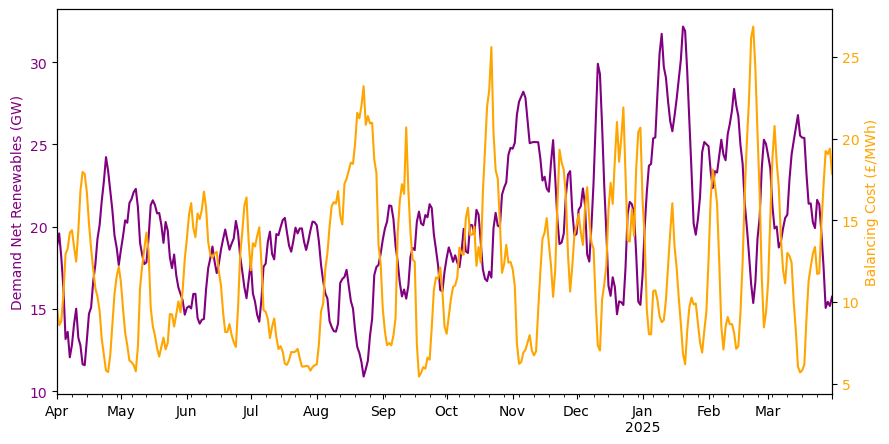

In [ ]:
# Set up a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the demand net renewables
price_data_daily_smoothed["Demand Net Renewables (GW)"].plot(
    ax=ax, color="purple", label="Demand Net Renewables"
)

# Set the labels and title
ax.set_ylabel("Demand Net Renewables (GW)", color="purple")

# Duplicate the x-axis for the date
ax2 = ax.twinx()

# Plot Day ahead prices on the secondary x-axis
price_data_daily_smoothed["Balancing"].plot(
    ax=ax2, color="orange", label="Day Ahead Price"
)

# Set the labels for the secondary y-axis
ax2.set_ylabel("Balancing Cost (£/MWh)", color="orange")

# set the ticks the same color as the line being plotted
ax2.tick_params(axis="y", labelcolor="orange")
ax.tick_params(axis="y", labelcolor="purple")

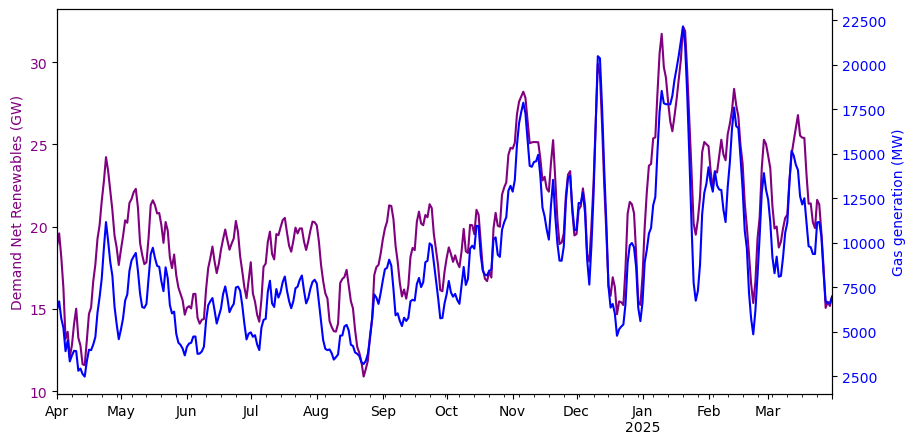

In [ ]:
# Set up a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the demand net renewables
price_data_daily_smoothed["Demand Net Renewables (GW)"].plot(
    ax=ax, color="purple", label="Demand Net Renewables"
)

# Set the labels and title
ax.set_ylabel("Demand Net Renewables (GW)", color="purple")

# Duplicate the x-axis for the date
ax2 = ax.twinx()

# Plot Day ahead prices on the secondary x-axis
price_data_daily_smoothed["Gas"].plot(ax=ax2, color="blue", label="Gross Imports")

# Set the labels for the secondary y-axis
ax2.set_ylabel("Gas generation (MW)", color="blue")

# set the ticks the same color as the line being plotted
ax2.tick_params(axis="y", labelcolor="blue")
ax.tick_params(axis="y", labelcolor="purple")

In [ ]:
# Convert gross imports to GW
price_data_daily_smoothed["Gross Imports (GW)"] = (
    price_data_daily_smoothed["Gross Imports"] / 1000
)

# Set up Demand Net Renewables Net Imports
price_data_daily_smoothed["Demand Net Renewables Net Imports (GW)"] = (
    price_data_daily_smoothed["Demand Net Renewables (GW)"]
    - price_data_daily_smoothed["Gross Imports (GW)"]
)

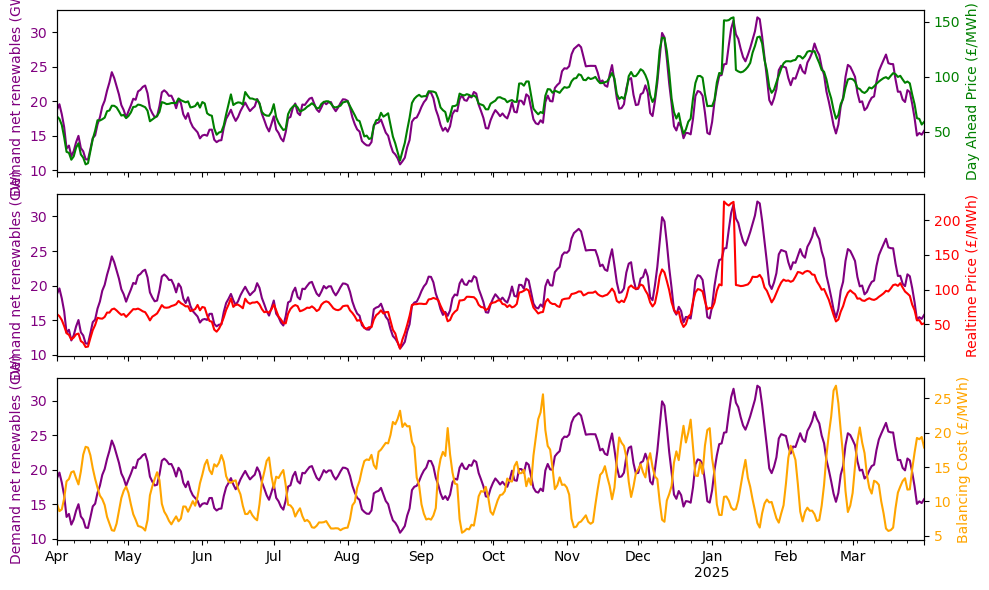

In [ ]:
# Set up a figure with three rows and one column, shared x-axis
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Set up the axes
ax1 = axs[0]
ax1_b = axs[0].twinx()
ax2 = axs[1]
ax2_b = axs[1].twinx()
ax3 = axs[2]
ax3_b = axs[2].twinx()

# Plot the demand net renewables net imports
price_data_daily_smoothed["Demand Net Renewables (GW)"].plot(
    ax=ax1, color="purple", label="Demand Net Renewables Net Imports"
)

# Plot the day ahead prices in green
price_data_daily_smoothed["Day Ahead"].plot(
    ax=ax1_b, color="green", label="Day Ahead Price"
)

# Set the labels and title for the first subplot
ax1.set_ylabel("Demand net renewables (GW)", color="purple")
ax1_b.set_ylabel("Day Ahead Price (£/MWh)", color="green")
# set the ticks the same color as the line being plotted
ax1_b.tick_params(axis="y", labelcolor="green")
ax1.tick_params(axis="y", labelcolor="purple")

# Plot the demand net renewables net imports on the second subplot
price_data_daily_smoothed["Demand Net Renewables (GW)"].plot(
    ax=ax2, color="purple", label="Demand Net Renewables Net Imports"
)
# Plot the realtime prices in red
price_data_daily_smoothed["Realtime"].plot(
    ax=ax2_b, color="red", label="Realtime Price"
)

# Set the labels for the second subplot
ax2.set_ylabel("Demand net renewables (GW)", color="purple")
ax2_b.set_ylabel("Realtime Price (£/MWh)", color="red")
# set the ticks the same color as the line being plotted
ax2_b.tick_params(axis="y", labelcolor="red")
ax2.tick_params(axis="y", labelcolor="purple")

# Plot the demand net renewables net imports on the third subplot
price_data_daily_smoothed["Demand Net Renewables (GW)"].plot(
    ax=ax3, color="purple", label="Demand Net Renewables Net Imports"
)
# Plot the balancing costs in orange
price_data_daily_smoothed["Balancing"].plot(
    ax=ax3_b, color="orange", label="Balancing Cost"
)

# Set the labels for the third subplot
ax3.set_ylabel("Demand net renewables (GW)", color="purple")
ax3_b.set_ylabel("Balancing Cost (£/MWh)", color="orange")
# set the ticks the same color as the line being plotted
ax3_b.tick_params(axis="y", labelcolor="orange")
ax3.tick_params(axis="y", labelcolor="purple")

# enforce a tight layout
plt.tight_layout()

In [ ]:
# Create a column for wind available - wind curtailed
price_data_daily_smoothed["Wind_Avail_Curtail_diff"] = (
    price_data_daily_smoothed["Wind Available"]
    - price_data_daily_smoothed["Wind Curtailed"]
)

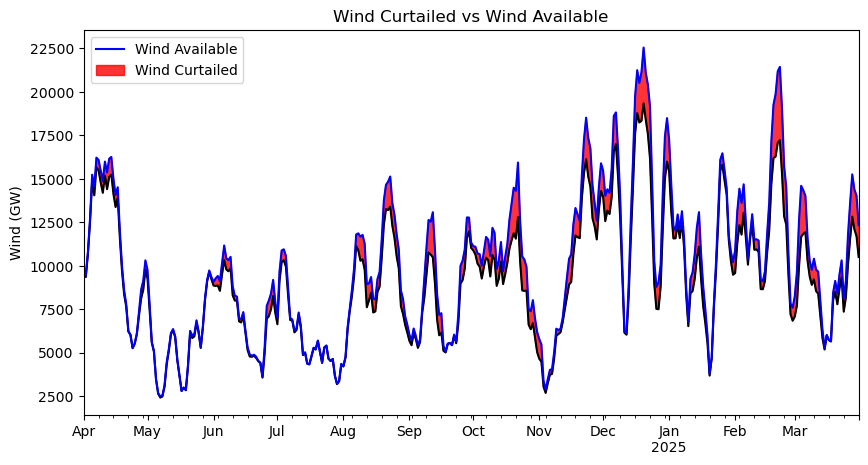

In [ ]:
# Plot the wind curtailed against the wind available
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the wind curtailed in orange
price_data_daily_smoothed["Wind_Avail_Curtail_diff"].plot(ax=ax, color="k", label="")

# Plot the wind available in blue
price_data_daily_smoothed["Wind Available"].plot(
    ax=ax, color="blue", label="Wind Available"
)

# Highlight the region between the two lines
ax.fill_between(
    price_data_daily_smoothed.index,
    price_data_daily_smoothed["Wind_Avail_Curtail_diff"],
    price_data_daily_smoothed["Wind Available"],
    where=(
        price_data_daily_smoothed["Wind_Avail_Curtail_diff"]
        < price_data_daily_smoothed["Wind Available"]
    ),
    color="red",
    alpha=0.8,
    label="Wind Curtailed",
)

# Duplicate the y-axis
# ax2 = ax.twinx()

# # Plot the gas generation
# price_data_daily_smoothed['Gas'].plot(ax=ax2, color='green', label='Gas Generation')

# Set the labels and title
ax.set_ylabel("Wind (GW)")
ax.set_title("Wind Curtailed vs Wind Available")

# # Set the labels for the secondary y-axis
# ax2.set_ylabel('Gas Generation (MW)', color='green')

# # Set up the labels for the figure legend
# labels_ax1 = ax.get_legend_handles_labels()
# labels_ax2 = ax2.get_legend_handles_labels()

# # Combine the labels from both axes
# labels_combined = labels_ax1[0] + labels_ax2[0]
# labels_combined_names = labels_ax1[1] + labels_ax2[1]
# # Set the legend with combined labels
# ax.legend(labels_combined, labels_combined_names, loc='upper left')

# Include the legend in the top left
ax.legend(loc="upper left")

In [29]:
price_data_daily_smoothed.columns

Index(['Nuclear', 'Biomass', 'Imports', 'Hydro', 'Wind', 'Solar', 'Gas',
       'Coal', 'Peaking', 'French', 'Dutch', 'Irish', 'Belgian', 'Norwegian',
       'Danish', 'Storage', 'Gross Imports', 'Gross Exports', 'Demand (MW)',
       'Demand Net (MW)', 'Fossil (MW)', 'Carbon (tCO₂/hr)', 'Carbon (g/kWh)',
       'Day Ahead', 'Realtime', 'Balancing', 'Temper-ature (°C)',
       'Wind Curtailed', 'Wind Available', 'Demand (GW)', 'Wind (GW)',
       'Solar (GW)', 'Demand Net Renewables (GW)', 'Gross Imports (GW)',
       'Demand Net Renewables Net Imports (GW)', 'Wind_Avail_Curtail_diff'],
      dtype='object')

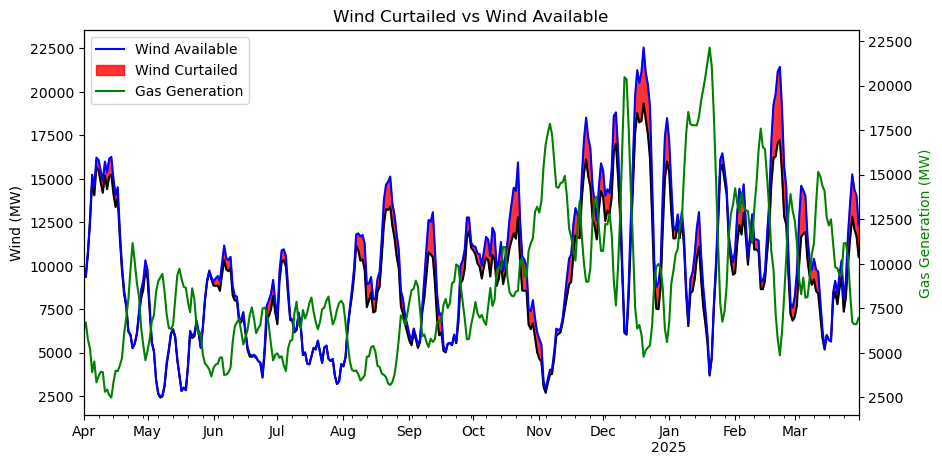

In [ ]:
# Do the same but including the price data
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the wind curtailed in orange
price_data_daily_smoothed["Wind_Avail_Curtail_diff"].plot(ax=ax, color="k", label="")

# Plot the wind available in blue
price_data_daily_smoothed["Wind Available"].plot(
    ax=ax, color="blue", label="Wind Available"
)

# Highlight the region between the two lines
ax.fill_between(
    price_data_daily_smoothed.index,
    price_data_daily_smoothed["Wind_Avail_Curtail_diff"],
    price_data_daily_smoothed["Wind Available"],
    where=(
        price_data_daily_smoothed["Wind_Avail_Curtail_diff"]
        < price_data_daily_smoothed["Wind Available"]
    ),
    color="red",
    alpha=0.8,
    label="Wind Curtailed",
)

# Duplicate the y-axis
ax2 = ax.twinx()

# Plot the gas generation
price_data_daily_smoothed["Gas"].plot(ax=ax2, color="green", label="Gas Generation")

# Set the labels and title
ax.set_ylabel("Wind (MW)")
ax.set_title("Wind Curtailed vs Wind Available")

# Set the labels for the secondary y-axis
ax2.set_ylabel("Gas Generation (MW)", color="green")

# Set up the labels for the figure legend
labels_ax1 = ax.get_legend_handles_labels()
labels_ax2 = ax2.get_legend_handles_labels()

# Combine the labels from both axes
labels_combined = labels_ax1[0] + labels_ax2[0]
labels_combined_names = labels_ax1[1] + labels_ax2[1]
# Set the legend with combined labels
ax.legend(labels_combined, labels_combined_names, loc="upper left")

# # Include the legend in the top left
# ax.legend(loc='upper left')

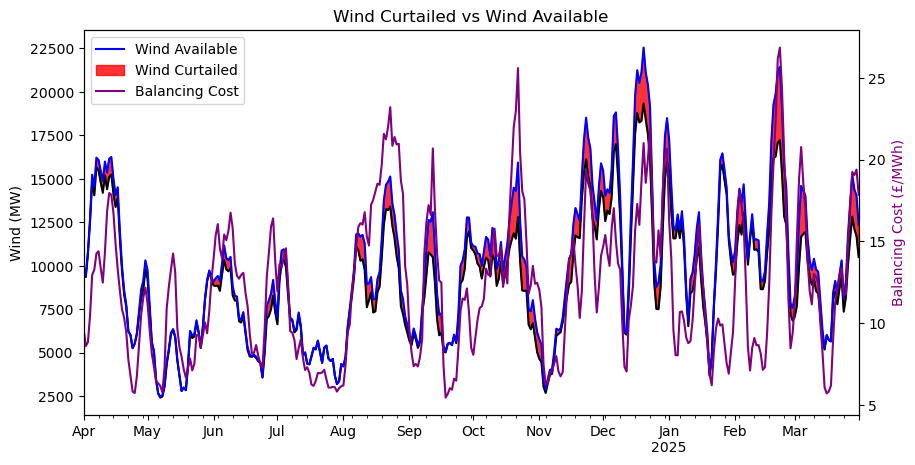

In [ ]:
# Do the same but including the price data
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the wind curtailed in orange
price_data_daily_smoothed["Wind_Avail_Curtail_diff"].plot(ax=ax, color="k", label="")

# Plot the wind available in blue
price_data_daily_smoothed["Wind Available"].plot(
    ax=ax, color="blue", label="Wind Available"
)

# Highlight the region between the two lines
ax.fill_between(
    price_data_daily_smoothed.index,
    price_data_daily_smoothed["Wind_Avail_Curtail_diff"],
    price_data_daily_smoothed["Wind Available"],
    where=(
        price_data_daily_smoothed["Wind_Avail_Curtail_diff"]
        < price_data_daily_smoothed["Wind Available"]
    ),
    color="red",
    alpha=0.8,
    label="Wind Curtailed",
)

# Duplicate the y-axis
ax2 = ax.twinx()

# Plot the gas generation
price_data_daily_smoothed["Balancing"].plot(
    ax=ax2, color="purple", label="Balancing Cost"
)

# Set the labels and title
ax.set_ylabel("Wind (MW)")
ax.set_title("Wind Curtailed vs Wind Available")

# Set the labels for the secondary y-axis
ax2.set_ylabel("Balancing Cost (£/MWh)", color="purple")

# Set up the labels for the figure legend
labels_ax1 = ax.get_legend_handles_labels()
labels_ax2 = ax2.get_legend_handles_labels()

# Combine the labels from both axes
labels_combined = labels_ax1[0] + labels_ax2[0]
labels_combined_names = labels_ax1[1] + labels_ax2[1]
# Set the legend with combined labels
ax.legend(labels_combined, labels_combined_names, loc="upper left")

# # Include the legend in the top left
# ax.legend(loc='upper left')

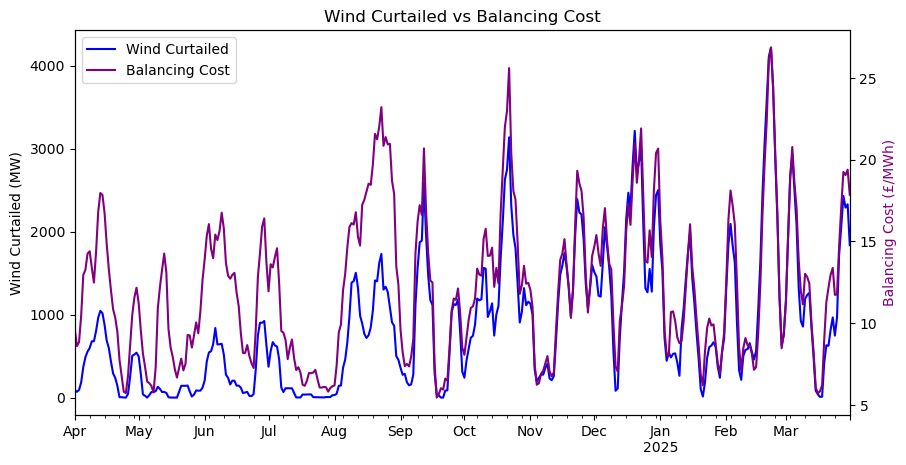

In [ ]:
# Do the same but including the price data
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the wind curtailed in orange
# price_data_daily_smoothed['Wind_Avail_Curtail_diff'].plot(ax=ax, color='k', label='')

# Plot the wind available in blue
price_data_daily_smoothed["Wind Curtailed"].plot(
    ax=ax, color="blue", label="Wind Curtailed"
)

# # Highlight the region between the two lines
# ax.fill_between(
#     price_data_daily_smoothed.index,
#     price_data_daily_smoothed['Wind_Avail_Curtail_diff'],
#     price_data_daily_smoothed['Wind Available'],
#     where=(price_data_daily_smoothed['Wind_Avail_Curtail_diff'] < price_data_daily_smoothed['Wind Available']),
#     color='red',
#     alpha=0.8,
#     label='Wind Curtailed',
# )

# Duplicate the y-axis
ax2 = ax.twinx()

# Plot the gas generation
price_data_daily_smoothed["Balancing"].plot(
    ax=ax2, color="purple", label="Balancing Cost"
)

# Set the labels and title
ax.set_ylabel("Wind Curtailed (MW)")
ax.set_title("Wind Curtailed vs Balancing Cost")

# Set the labels for the secondary y-axis
ax2.set_ylabel("Balancing Cost (£/MWh)", color="purple")

# Set up the labels for the figure legend
labels_ax1 = ax.get_legend_handles_labels()
labels_ax2 = ax2.get_legend_handles_labels()

# Combine the labels from both axes
labels_combined = labels_ax1[0] + labels_ax2[0]
labels_combined_names = labels_ax1[1] + labels_ax2[1]
# Set the legend with combined labels
ax.legend(labels_combined, labels_combined_names, loc="upper left")

# # Include the legend in the top left
# ax.legend(loc='upper left')

In [ ]:
# Calculate demand net wind curtailed
price_data_daily_smoothed["Demand Net Wind Curtailed (MW)"] = (
    price_data_daily_smoothed["Demand (MW)"]
    - price_data_daily_smoothed["Wind Curtailed"]
)

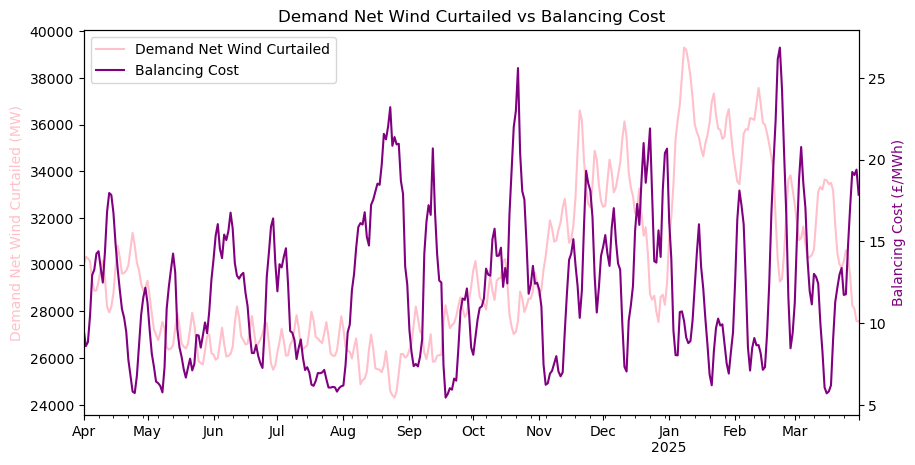

In [ ]:
# Do the same but including the price data
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the wind curtailed in orange
# price_data_daily_smoothed['Wind_Avail_Curtail_diff'].plot(ax=ax, color='k', label='')

# Plot the wind available in blue
price_data_daily_smoothed["Demand Net Wind Curtailed (MW)"].plot(
    ax=ax, color="pink", label="Demand Net Wind Curtailed"
)

# # Highlight the region between the two lines
# ax.fill_between(
#     price_data_daily_smoothed.index,
#     price_data_daily_smoothed['Wind_Avail_Curtail_diff'],
#     price_data_daily_smoothed['Wind Available'],
#     where=(price_data_daily_smoothed['Wind_Avail_Curtail_diff'] < price_data_daily_smoothed['Wind Available']),
#     color='red',
#     alpha=0.8,
#     label='Wind Curtailed',
# )

# Duplicate the y-axis
ax2 = ax.twinx()

# Plot the gas generation
price_data_daily_smoothed["Balancing"].plot(
    ax=ax2, color="purple", label="Balancing Cost"
)

# Set the labels and title
ax.set_ylabel("Demand Net Wind Curtailed (MW)", color="pink")
ax.set_title("Demand Net Wind Curtailed vs Balancing Cost")

# Set the labels for the secondary y-axis
ax2.set_ylabel("Balancing Cost (£/MWh)", color="purple")

# Set up the labels for the figure legend
labels_ax1 = ax.get_legend_handles_labels()
labels_ax2 = ax2.get_legend_handles_labels()

# Combine the labels from both axes
labels_combined = labels_ax1[0] + labels_ax2[0]
labels_combined_names = labels_ax1[1] + labels_ax2[1]
# Set the legend with combined labels
ax.legend(labels_combined, labels_combined_names, loc="upper left")

# # Include the legend in the top left
# ax.legend(loc='upper left')

### Most expensive situation (summer curtailment gap) ###

* Too much wind (leading to curtailment)
* Low demand
* High solar

In [41]:
price_data_daily_smoothed.columns

Index(['Nuclear', 'Biomass', 'Imports', 'Hydro', 'Wind', 'Solar', 'Gas',
       'Coal', 'Peaking', 'French', 'Dutch', 'Irish', 'Belgian', 'Norwegian',
       'Danish', 'Storage', 'Gross Imports', 'Gross Exports', 'Demand (MW)',
       'Demand Net (MW)', 'Fossil (MW)', 'Carbon (tCO₂/hr)', 'Carbon (g/kWh)',
       'Day Ahead', 'Realtime', 'Balancing', 'Temper-ature (°C)',
       'Wind Curtailed', 'Wind Available', 'Demand (GW)', 'Wind (GW)',
       'Solar (GW)', 'Demand Net Renewables (GW)', 'Gross Imports (GW)',
       'Demand Net Renewables Net Imports (GW)', 'Wind_Avail_Curtail_diff',
       'Demand Net Wind Curtailed (MW)'],
      dtype='object')

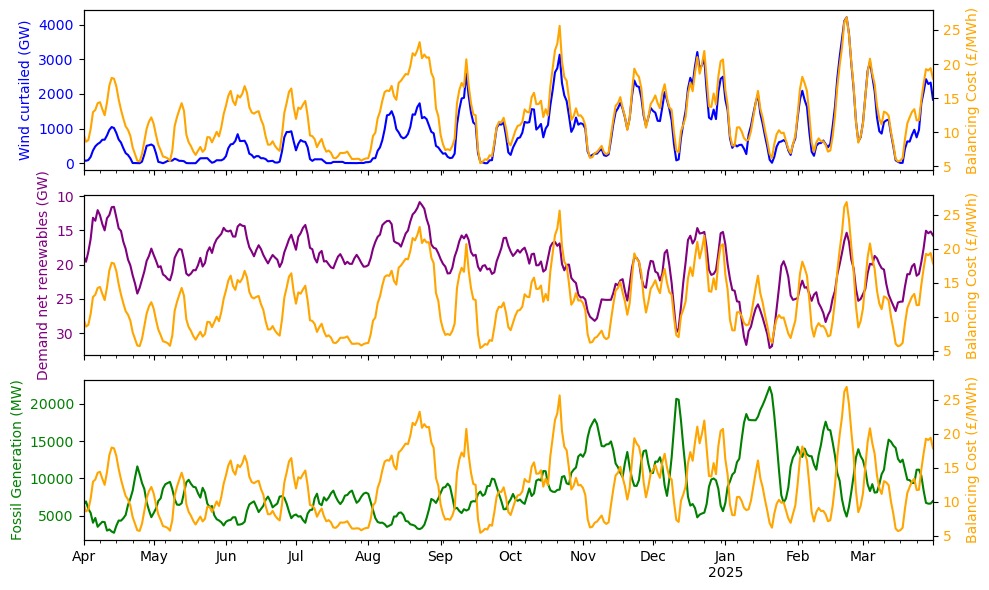

In [ ]:
# Set up a figure with three rows and one column, shared x-axis
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Set up the axes
ax1 = axs[0]
ax1_b = axs[0].twinx()
ax2 = axs[1]
ax2_b = axs[1].twinx()
ax3 = axs[2]
ax3_b = axs[2].twinx()

# Plot the demand net renewables net imports
# price_data_daily_smoothed['Demand Net Renewables (GW)'].plot(ax=ax1, color='purple', label='Demand Net Renewables Net Imports')
# Plot the wind available in blue
price_data_daily_smoothed["Wind Curtailed"].plot(
    ax=ax1, color="blue", label="Wind Curtailed"
)

# # Plot the wind available in blue
# price_data_daily_smoothed['Wind Curtailed'].plot(ax=ax, color='blue', label='Wind Curtailed')

# Plot the day ahead prices in green
price_data_daily_smoothed["Balancing"].plot(
    ax=ax1_b, color="orange", label="Balancing Cost"
)

# Set the labels and title for the first subplot
ax1.set_ylabel("Wind curtailed (GW)", color="blue")
ax1_b.set_ylabel("Balancing Cost (£/MWh)", color="orange")
# set the ticks the same color as the line being plotted
ax1_b.tick_params(axis="y", labelcolor="orange")
ax1.tick_params(axis="y", labelcolor="blue")

# Plot the demand net renewables net imports on the second subplot
price_data_daily_smoothed["Demand Net Renewables (GW)"].plot(
    ax=ax2, color="purple", label="Inverse demand net renewables"
)
# Plot the realtime prices in red
price_data_daily_smoothed["Balancing"].plot(
    ax=ax2_b, color="orange", label="Balancing Cost"
)

# Flip the ax2
ax2.invert_yaxis()

# Set the labels for the second subplot
ax2.set_ylabel("Demand net renewables (GW)", color="purple")
ax2_b.set_ylabel("Balancing Cost (£/MWh)", color="orange")
# set the ticks the same color as the line being plotted
ax2_b.tick_params(axis="y", labelcolor="orange")
ax2.tick_params(axis="y", labelcolor="purple")

# Plot the demand net renewables net imports on the third subplot
price_data_daily_smoothed["Fossil (MW)"].plot(
    ax=ax3, color="green", label="Fossil Generation (MW)"
)
# Plot the balancing costs in orange
price_data_daily_smoothed["Balancing"].plot(
    ax=ax3_b, color="orange", label="Balancing Cost"
)

# Set the labels for the third subplot
ax3.set_ylabel("Fossil Generation (MW)", color="green")
ax3_b.set_ylabel("Balancing Cost (£/MWh)", color="orange")
# set the ticks the same color as the line being plotted
ax3_b.tick_params(axis="y", labelcolor="orange")
ax3.tick_params(axis="y", labelcolor="green")

# enforce a tight layout
plt.tight_layout()

In [47]:
price_data_daily_smoothed.columns

Index(['Nuclear', 'Biomass', 'Imports', 'Hydro', 'Wind', 'Solar', 'Gas',
       'Coal', 'Peaking', 'French', 'Dutch', 'Irish', 'Belgian', 'Norwegian',
       'Danish', 'Storage', 'Gross Imports', 'Gross Exports', 'Demand (MW)',
       'Demand Net (MW)', 'Fossil (MW)', 'Carbon (tCO₂/hr)', 'Carbon (g/kWh)',
       'Day Ahead', 'Realtime', 'Balancing', 'Temper-ature (°C)',
       'Wind Curtailed', 'Wind Available', 'Demand (GW)', 'Wind (GW)',
       'Solar (GW)', 'Demand Net Renewables (GW)', 'Gross Imports (GW)',
       'Demand Net Renewables Net Imports (GW)', 'Wind_Avail_Curtail_diff',
       'Demand Net Wind Curtailed (MW)'],
      dtype='object')

In [ ]:
# Create the renewables column
price_data_daily_smoothed["Renewables (GW)"] = (
    price_data_daily_smoothed["Wind (GW)"] + price_data_daily_smoothed["Solar (GW)"]
)

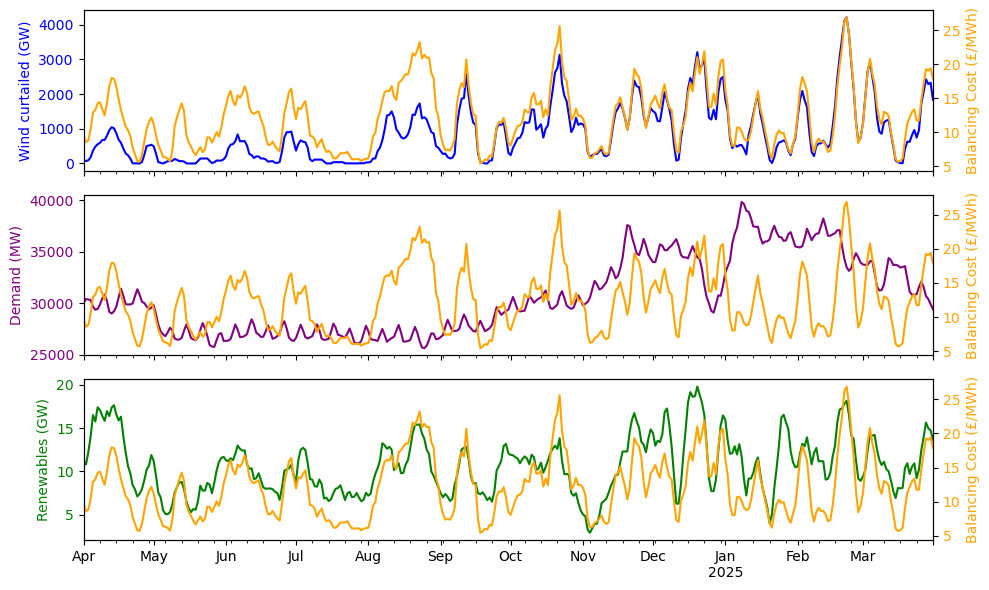

In [ ]:
# Set up a figure with three rows and one column, shared x-axis
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Set up the axes
ax1 = axs[0]
ax1_b = axs[0].twinx()
ax2 = axs[1]
ax2_b = axs[1].twinx()
ax3 = axs[2]
ax3_b = axs[2].twinx()

# Plot the demand net renewables net imports
# price_data_daily_smoothed['Demand Net Renewables (GW)'].plot(ax=ax1, color='purple', label='Demand Net Renewables Net Imports')
# Plot the wind available in blue
price_data_daily_smoothed["Wind Curtailed"].plot(
    ax=ax1, color="blue", label="Wind Curtailed"
)

# # Plot the wind available in blue
# price_data_daily_smoothed['Wind Curtailed'].plot(ax=ax, color='blue', label='Wind Curtailed')

# Plot the day ahead prices in green
price_data_daily_smoothed["Balancing"].plot(
    ax=ax1_b, color="orange", label="Balancing Cost"
)

# Set the labels and title for the first subplot
ax1.set_ylabel("Wind curtailed (GW)", color="blue")
ax1_b.set_ylabel("Balancing Cost (£/MWh)", color="orange")
# set the ticks the same color as the line being plotted
ax1_b.tick_params(axis="y", labelcolor="orange")
ax1.tick_params(axis="y", labelcolor="blue")

# Plot the demand net renewables net imports on the second subplot
price_data_daily_smoothed["Demand (MW)"].plot(
    ax=ax2, color="purple", label="Demand (MW)"
)
# Plot the realtime prices in red
price_data_daily_smoothed["Balancing"].plot(
    ax=ax2_b, color="orange", label="Balancing Cost"
)

# Flip the ax2
# ax2.invert_yaxis()

# Set the labels for the second subplot
ax2.set_ylabel("Demand (MW)", color="purple")
ax2_b.set_ylabel("Balancing Cost (£/MWh)", color="orange")
# set the ticks the same color as the line being plotted
ax2_b.tick_params(axis="y", labelcolor="orange")
ax2.tick_params(axis="y", labelcolor="purple")

# Plot the demand net renewables net imports on the third subplot
price_data_daily_smoothed["Renewables (GW)"].plot(
    ax=ax3, color="green", label="Renewables (GW)"
)
# Plot the balancing costs in orange
price_data_daily_smoothed["Balancing"].plot(
    ax=ax3_b, color="orange", label="Balancing Cost"
)

# Set the labels for the third subplot
ax3.set_ylabel("Renewables (GW)", color="green")
ax3_b.set_ylabel("Balancing Cost (£/MWh)", color="orange")
# set the ticks the same color as the line being plotted
ax3_b.tick_params(axis="y", labelcolor="orange")
ax3.tick_params(axis="y", labelcolor="green")

# enforce a tight layout
plt.tight_layout()